# Ucitavanje biblioteka i podataka

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,validation_curve,ValidationCurveDisplay,learning_curve,LearningCurveDisplay,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,precision_recall_curve,precision_recall_fscore_support,precision_score,confusion_matrix,ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler,TargetEncoder,OrdinalEncoder,label_binarize,FunctionTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from matplotlib.colors import ListedColormap

In [ ]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

In [ ]:
!gdown 1M3B0g1_0WjoUePif1cYjKQPixmz-7izX

Downloading...
From: https://drive.google.com/uc?id=1M3B0g1_0WjoUePif1cYjKQPixmz-7izX
To: /content/train_clean.csv
100% 255k/255k [00:00<00:00, 25.6MB/s]


In [ ]:
df = pd.read_csv("train_clean.csv")

In [ ]:
df.head()

Unnamed: 0  battery_power  blue  clock_speed  dual_sim  fc  four_g  \
0           0            842     0          2.2         0   1       0   
1           1           1021     1          0.5         1   0       1   
2           2            563     1          0.5         1   2       1   
3           3            615     1          2.5         0   0       0   
4           4           1821     1          1.2         0  13       1   

   int_memory  m_dep  mobile_wt  ...  price_range  has_fc  has_pc  \
0           7    0.6        188  ...            1     1.0     1.0   
1          53    0.7        136  ...            2     0.0     1.0   
2          41    0.9        145  ...            2     1.0     1.0   
3          10    0.8        131  ...            2     0.0     1.0   
4          44    0.6        141  ...            1     1.0     1.0   

   screen_size  screen_quality   ram_size        speed  multicore_processor  \
0         4.49              HD  2 to 3 GB  upto 2.5GHz                  1.0   
1         6.80              HD  2 to 3 GB    upto 1GHz                  1.0   
2         4.40              HD  2 to 3 GB    upto 1GHz                  1.0   
3         7.04              HD  2 to 3 GB  upto 2.5GHz                  1.0   
4         3.25              HD  1 to 2 GB  upto 1.5GHz                  1.0   

   primary_camera  front_camera  
0        upto 4MP      upto 4MP  
1        upto 8MP     No Camera  
2        upto 8MP      upto 4MP  
3       upto 12MP     No Camera  
4       upto 16MP     upto 16MP  

[5 rows x 29 columns]

In [ ]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'has_fc', 'has_pc', 'screen_size', 'screen_quality',
       'ram_size', 'speed', 'multicore_processor', 'primary_camera',
       'front_camera'],
      dtype='object')

In [ ]:
for feature in df.columns:
  print(f"feature |{feature}| has unique values:\n{df[feature].unique()}\n")

feature |battery_power| has unique values:
[ 842 1021  563 ... 1139 1467  858]

feature |blue| has unique values:
[0 1]

feature |clock_speed| has unique values:
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

feature |dual_sim| has unique values:
[0 1]

feature |fc| has unique values:
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

feature |four_g| has unique values:
[0 1]

feature |int_memory| has unique values:
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

feature |m_dep| has unique values:
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

feature |mobile_wt| has unique values:
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 1

# ML nmp

In [ ]:
X =
y = df["price_range"]

In [ ]:
X.head()

ram
0  2549
1  2631
2  2603
3  2769
4  1411

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17,stratify=y)

In [ ]:
X_train.head()

ram
464    604
397   1414
672    452
1484  2637
544   1853

In [ ]:
for feature in X.columns:
  if((len(X[feature].unique())) < 10):
    print(f"Feature |{feature}| unique values :\n{X[feature].unique()}\n")

In [ ]:
binary_features = [
    "blue", "dual_sim", "four_g", "three_g", "touch_screen",
    "wifi", "has_fc", "has_pc", "multicore_processor"
]

ordinal_features = {
    "screen_quality": ["Not HD", "HD"],
    "speed": ["upto 1GHz", "upto 1.5GHz", "upto 2GHz", "upto 2.5GHz", "upto 3.0GHz"],
    "primary_camera": ["No Camera", "upto 4MP", "upto 8MP", "upto 12MP", "upto 16MP", "upto 20MP"],
    "front_camera": ["No Camera", "upto 4MP", "upto 8MP", "upto 12MP", "upto 16MP", "upto 20MP"]
}

## Classification pipeline function

In [ ]:
def build_classification_pipeline(binary_features,ordinal_features,scale_numeric=False,classifier=LogisticRegression(),use_gridsearch=False,param_grid=None,cv=StratifiedKFold(n_splits=5,random_state = 17,shuffle = True),scoring="accuracy",n_jobs=-1):
    # ordinal transformer
    ordinal_transformer = OrdinalEncoder(categories=list(ordinal_features.values()))

    # decide what to do with remainder features
    if scale_numeric:
        remainder_transformer = StandardScaler()
    else:
        remainder_transformer = "passthrough"

    preprocessor = ColumnTransformer(
        transformers=[
            ("binary", "passthrough", binary_features),
            ("ordinal", ordinal_transformer, list(ordinal_features.keys()))
        ],
        remainder=remainder_transformer
    )

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    if use_gridsearch:
        if param_grid is None:
            print("param_grid not provided. Returning plain pipeline instead of GridSearchCV.")
            return pipe
        else:
            return GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs)
    else:
        return pipe


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def build_classification_pipeline(
    binary_features,
    ordinal_features,
    scale_numeric=False,
    classifier=LogisticRegression(),
    use_gridsearch=False,
    param_grid=None,
    cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
    scoring="accuracy",
    n_jobs=-1
):
    # ordinal transformer
    if ordinal_features:
        ordinal_transformer = OrdinalEncoder(categories=list(ordinal_features.values()))
    else:
        ordinal_transformer = "passthrough"

    # decide what to do with remainder features
    if scale_numeric:
        remainder_transformer = StandardScaler()
    else:
        remainder_transformer = "passthrough"

    transformers = []
    if binary_features:
        transformers.append(("binary", "passthrough", binary_features))
    if ordinal_features:
        transformers.append(("ordinal", ordinal_transformer, list(ordinal_features.keys())))

    preprocessor = ColumnTransformer(
        transformers=transformers,
        remainder=remainder_transformer
    )

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    if use_gridsearch:
        if param_grid is None:
            print("param_grid not provided. Returning plain pipeline instead of GridSearchCV.")
            return pipe
        else:
            return GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs)
    else:
        return pipe


In [ ]:
# X mora biti DataFrame, ne Series!
X = df[["ram"]]   # dvostruke uglaste!
y = df["price_range"]

pipe = build_classification_pipeline(
    binary_features=[],          # nema binarnih
    ordinal_features={},         # nema ordinalnih
    scale_numeric=True,          # hoćeš da standardizuješ RAM
    classifier=LogisticRegression(max_iter=500)
)

pipe.fit(X, y)
print(pipe.score(X, y))


0.755


WITH DIFFERENT SCALERS

In [ ]:
def build_classification_pipeline_with_scalers(
    df,  # pass the full dataframe to auto-detect numeric features
    binary_features,
    ordinal_features,
    numeric_features=None,  # optional, if None will auto-detect
    classifier=None,
    scale_option="none",  # "none", "standard", "grid"
    use_gridsearch=False,
    param_grid=None,
    cv=StratifiedKFold(n_splits=5,random_state = 17,shuffle = True),
    scoring="accuracy",
    n_jobs=-1
):

    if classifier is None:
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(max_iter=1000)

    # ordinal transformer
    ordinal_transformer = OrdinalEncoder(categories=list(ordinal_features.values()))

    # auto detect numeric features if not provided
    if numeric_features is None:
        numeric_features = [col for col in df.columns
                            if col not in binary_features and col not in ordinal_features.keys()]

    # numeric transformer
    if scale_option == "none":
        numeric_transformer = "passthrough"
    elif scale_option == "standard":
        numeric_transformer = StandardScaler()
    elif scale_option == "grid":
        #placeholder; actual scalers will be added via param_grid
        #numeric_transformer = FunctionTransformer(validate=False)
        numeric_transformer = "passthrough"
    else:
        raise ValueError("scale_option must be 'none', 'standard', or 'grid'")

    # preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ("binary", "passthrough", binary_features),
            ("ordinal", ordinal_transformer, list(ordinal_features.keys())),
            ("numeric", numeric_transformer, numeric_features)
        ]
    )

    # pipeline
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    # grid search
    if use_gridsearch:
        if param_grid is None:
            param_grid = {}
        if scale_option == "grid":
            param_grid["preprocessor__numeric"] = [
                StandardScaler(), MinMaxScaler(), RobustScaler(), "passthrough"
            ]
        return GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs)
    else:
        return pipe


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def build_classification_pipeline_with_scalers(
    df,  # pass the full dataframe to auto-detect numeric features
    binary_features=None,
    ordinal_features=None,
    numeric_features=None,  # optional, if None will auto-detect
    classifier=None,
    scale_option="none",  # "none", "standard", "grid"
    use_gridsearch=False,
    param_grid=None,
    cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
    scoring="accuracy",
    n_jobs=-1
):
    if binary_features is None:
        binary_features = []
    if ordinal_features is None:
        ordinal_features = {}

    if classifier is None:
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(max_iter=1000)

    # ordinal transformer (ako nema ordinal_features, samo passthrough)
    if ordinal_features:
        ordinal_transformer = OrdinalEncoder(categories=list(ordinal_features.values()))
    else:
        ordinal_transformer = "passthrough"

    # auto-detect numeric features if not provided
    if numeric_features is None:
        numeric_features = [
            col for col in df.columns
            if col not in binary_features and col not in ordinal_features.keys()
        ]

    # numeric transformer
    if scale_option == "none":
        numeric_transformer = "passthrough"
    elif scale_option == "standard":
        numeric_transformer = StandardScaler()
    elif scale_option == "grid":
        numeric_transformer = "passthrough"  # placeholder, GridSearch će to zamijeniti
    else:
        raise ValueError("scale_option must be 'none', 'standard', or 'grid'")

    # Sastavi listu transformera, ali samo ako postoji feature-a
    transformers = []
    if binary_features:
        transformers.append(("binary", "passthrough", binary_features))
    if ordinal_features:
        transformers.append(("ordinal", ordinal_transformer, list(ordinal_features.keys())))
    if numeric_features:
        transformers.append(("numeric", numeric_transformer, numeric_features))

    preprocessor = ColumnTransformer(transformers=transformers)

    # pipeline
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    # grid search
    if use_gridsearch:
        if param_grid is None:
            param_grid = {}
        if scale_option == "grid":
            param_grid["preprocessor__numeric"] = [
                StandardScaler(), MinMaxScaler(), RobustScaler(), "passthrough"
            ]
        return GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs)
    else:
        return pipe


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def build_classification_pipeline_with_scalers(
    df,  # pass the full dataframe to auto-detect numeric features
    binary_features=None,
    ordinal_features=None,
    numeric_features=None,  # optional, if None will auto-detect
    classifier=None,
    scale_option="none",  # "none", "standard", "grid"
    use_gridsearch=False,
    param_grid=None,
    cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
    scoring="accuracy",
    n_jobs=-1
):
    if binary_features is None:
        binary_features = []
    if ordinal_features is None:
        ordinal_features = {}

    if classifier is None:
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(max_iter=1000)

    # ordinal transformer (ako nema ordinal_features, samo passthrough)
    if ordinal_features:
        ordinal_transformer = OrdinalEncoder(categories=list(ordinal_features.values()))
    else:
        ordinal_transformer = "passthrough"

    # auto-detect numeric features if not provided
    if numeric_features is None:
        numeric_features = [
            col for col in df.columns
            if col not in binary_features and col not in ordinal_features.keys()
        ]

    # numeric transformer
    if scale_option == "none":
        numeric_transformer = "passthrough"
    elif scale_option == "standard":
        numeric_transformer = StandardScaler()
    elif scale_option == "grid":
        numeric_transformer = "passthrough"  # placeholder, GridSearch će to zamijeniti
    else:
        raise ValueError("scale_option must be 'none', 'standard', or 'grid'")

    # Sastavi listu transformera, ali samo ako postoji feature-a
    transformers = []
    if binary_features:
        transformers.append(("binary", "passthrough", binary_features))
    if ordinal_features:
        transformers.append(("ordinal", ordinal_transformer, list(ordinal_features.keys())))
    if numeric_features:
        transformers.append(("numeric", numeric_transformer, numeric_features))

    preprocessor = ColumnTransformer(transformers=transformers)

    # pipeline
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    # grid search
    if use_gridsearch:
        if param_grid is None:
            param_grid = {}
        if scale_option == "grid":
            param_grid["preprocessor__numeric"] = [
                StandardScaler(), MinMaxScaler(), RobustScaler(), "passthrough"
            ]
        return GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs)
    else:
        return pipe


## Model evaluation function

In [ ]:
def evaluate_classifier(pipe, X_train, y_train, X_test, y_test, show_top_n=5):

    # Classification report
    print("Classification Report:\n")
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()

    # Weighted scores
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    print(f"\nWeighted Precision: {prec:.3f}, Recall: {rec:.3f}, F1-score: {f1:.3f}")

    # Test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)

    # Multi-class ROC and PR curves
    classes = pipe.classes_ if hasattr(pipe, "classes_") else pipe.named_steps['classifier'].classes_
    y_test_bin = label_binarize(y_test, classes=classes)
    y_score = pipe.predict_proba(X_test)

    # ROC curves (one-vs-rest)
    plt.figure(figsize=(8,6))
    for i, class_label in enumerate(classes):
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i], y_score[:, i], name=f"Class {class_label}", ax=plt.gca()
        )
    plt.title("One vs Rest ROC Curves")
    plt.show()

    # Precision-recall curves (one-vs-rest)
    plt.figure(figsize=(8,6))
    for i, class_label in enumerate(classes):
        PrecisionRecallDisplay.from_predictions(
            y_test_bin[:, i], y_score[:, i], name=f"Class {class_label}", ax=plt.gca()
        )
    plt.title("One vs Rest Precision-Recall Curves")
    plt.show()

    # Learning curve
    LearningCurveDisplay.from_estimator(pipe, X_train, y_train, cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True), scoring="accuracy")
    plt.show()

    # Get best CV score and parameters
    best_cv_score = getattr(pipe, 'best_score_', None)
    best_params = getattr(pipe, 'best_params_', None)

    # Top-N GridSearchCV candidates table + bar chart
    cv_results_df = None
    if hasattr(pipe, "cv_results_"):
        print(f"\nTop {show_top_n} GridSearchCV candidates:")
        cv_results = pd.DataFrame(pipe.cv_results_)
        cv_results_df = cv_results.sort_values(by="mean_test_score", ascending=False)
        display(cv_results_df[["mean_test_score", "std_test_score", "params"]].head(show_top_n))

        # Bar chart for top-N candidates
        top_cv = cv_results_df.head(show_top_n)
        scores = top_cv["mean_test_score"]
        stds = top_cv["std_test_score"]
        labels = [str(params) for params in top_cv["params"]]

        plt.figure(figsize=(10,5))
        plt.barh(range(len(scores)), scores, xerr=stds, color="skyblue")
        plt.yticks(range(len(scores)), labels)
        plt.xlabel("Mean CV Accuracy")
        plt.title(f"Top {show_top_n} GridSearchCV Candidates")
        plt.gca().invert_yaxis()  # best candidate on top
        plt.show()

    # Return all the metrics
    metrics = {
        'test_accuracy': test_accuracy,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'best_cv_score': best_cv_score,
        'best_params': best_params,
        'confusion_matrix': cm,
        'cv_results': cv_results_df
    }

    return metrics

## Base models (unscaled)

### Logistic Regression

In [ ]:
X = df[["ram"]]  # DataFrame, ne Series!
y = df["price_range"]

pipe = build_classification_pipeline_with_scalers(
    df=X,                # proslijedi DataFrame
    binary_features=[],  # nema binarnih
    ordinal_features={}, # nema ordinalnih
    scale_option="standard"  # skaliranje numeričkih
)

pipe.fit(X, y)
print(pipe.score(X, y))


0.755


In [ ]:
all_base_unscaled_models_metrics = {}

In [ ]:
log_reg_base_unscaled_pipe = build_classification_pipeline(binary_features,ordinal_features,False,LogisticRegression(max_iter=10000,random_state = 17))

In [ ]:
log_reg_base_unscaled_pipe.fit(X_train,y_train)

In [ ]:
log_reg_base_unscaled_metrics = evaluate_classifier(log_reg_base_unscaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
all_base_unscaled_models_metrics['Base Logistic Regression(unscaled)'] = log_reg_base_unscaled_metrics

### KNN

In [ ]:
knn_base_unscaled_pipe = build_classification_pipeline(binary_features,ordinal_features,False,KNeighborsClassifier())

In [ ]:
knn_base_unscaled_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', 'passthrough',
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'three_g', 'touch_screen',
                                                   'wifi', 'has_fc', 'has_pc',
                                                   'multicore_processor']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'HD',
                                                                              'HD'],
                                                                             ['upto '
                                                                              '1GHz',
                                                                              'upto '
                                                                              '1.5GHz',
                                                                              'upto '
                                                                              '2GHz',
                                                                              'upto '
                                                                              '2.5GHz',
                                                                              'upto '
                                                                              '3.0GHz'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP']]),
                                                  ['screen_quality', 'speed',
                                                   'primary_camera',
                                                   'front_camera'])])),
                ('classifier', KNeighborsClassifier()

Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.48      0.43       100
           1       0.25      0.31      0.28       100
           2       0.37      0.32      0.34       100
           3       0.31      0.22      0.26       100

    accuracy                           0.33       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.33      0.33      0.33       400



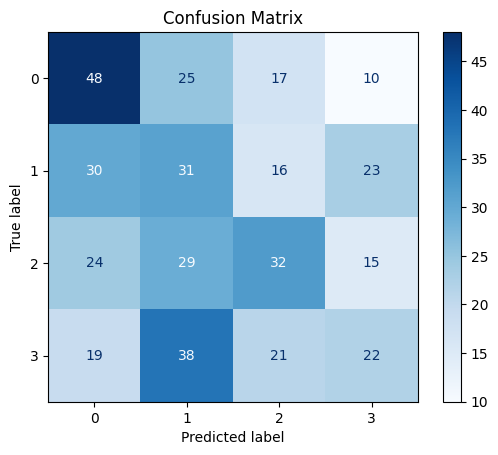


Weighted Precision: 0.334, Recall: 0.333, F1-score: 0.329


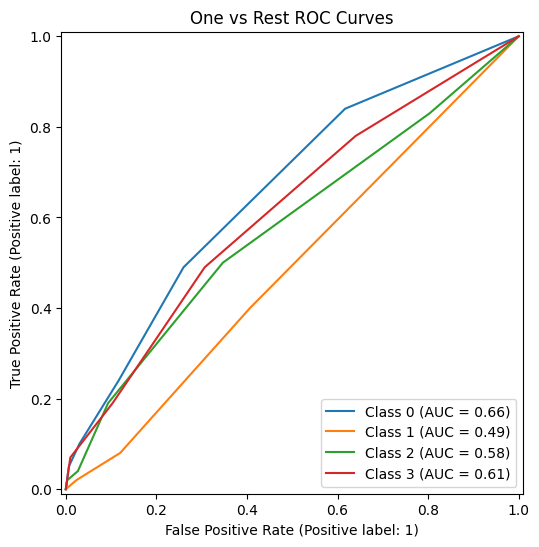

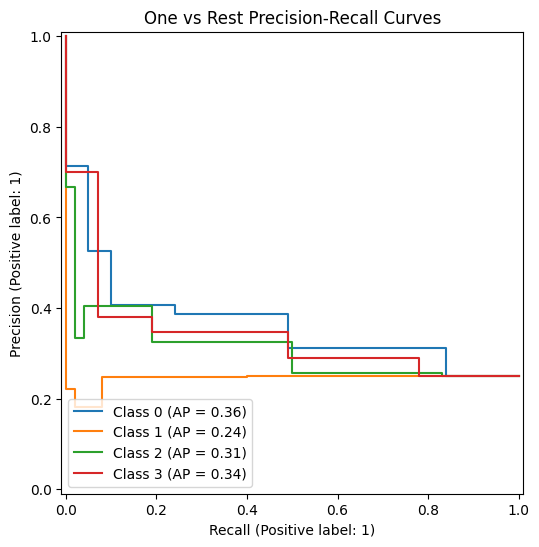

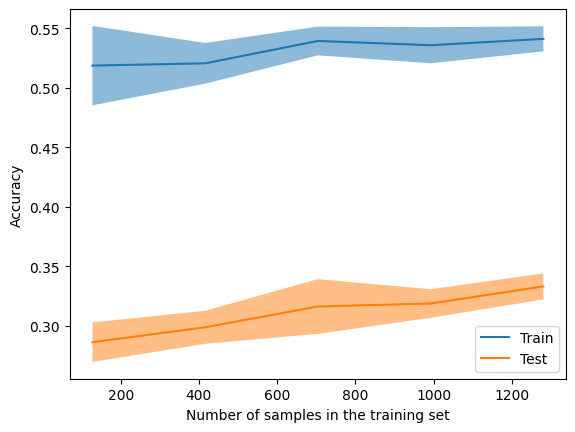

In [ ]:
knn_base_unscaled_metrics = evaluate_classifier(knn_base_unscaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
all_base_unscaled_models_metrics['Base KNN(unscaled)'] = knn_base_unscaled_metrics

### SVM

In [ ]:
svc_base_unscaled_pipe = build_classification_pipeline(binary_features,ordinal_features,False,SVC(probability=True,random_state=17))

In [ ]:
svc_base_unscaled_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', 'passthrough',
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'three_g', 'touch_screen',
                                                   'wifi', 'has_fc', 'has_pc',
                                                   'multicore_processor']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'HD',
                                                                              'HD'],
                                                                             ['upto '
                                                                              '1GHz',
                                                                              'upto '
                                                                              '1.5GHz',
                                                                              'upto '
                                                                              '2GHz',
                                                                              'upto '
                                                                              '2.5GHz',
                                                                              'upto '
                                                                              '3.0GHz'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP']]),
                                                  ['screen_quality', 'speed',
                                                   'primary_camera',
                                                   'front_camera'])])),
                ('classifier', SVC(probability=True, 

Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.71      0.47       100
           1       0.00      0.00      0.00       100
           2       0.33      0.07      0.12       100
           3       0.37      0.63      0.46       100

    accuracy                           0.35       400
   macro avg       0.26      0.35      0.26       400
weighted avg       0.26      0.35      0.26       400



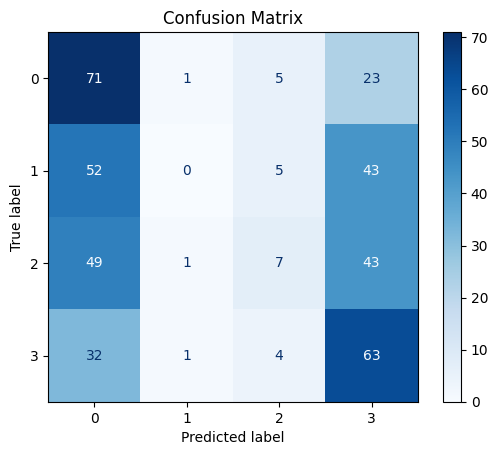


Weighted Precision: 0.262, Recall: 0.352, F1-score: 0.262


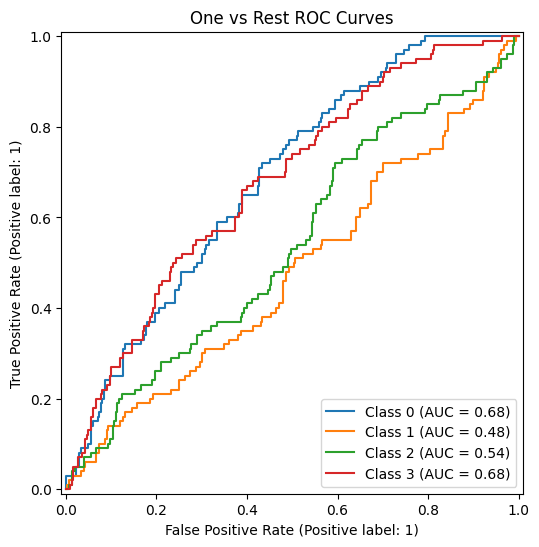

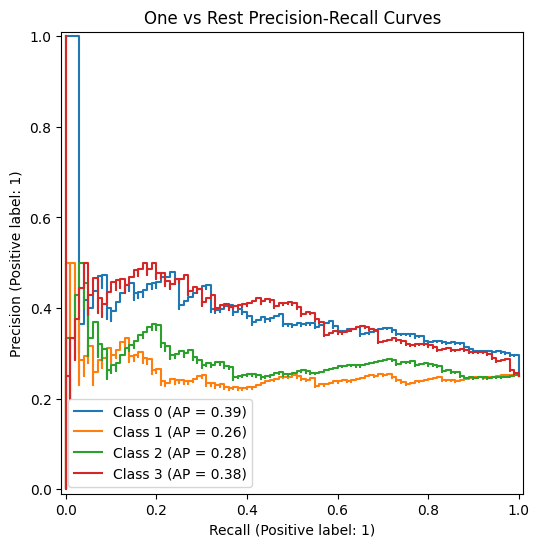

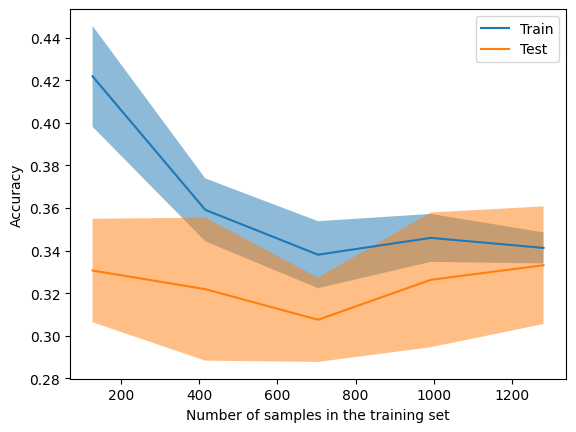

In [ ]:
svm_base_unscaled_metrics = evaluate_classifier(svc_base_unscaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
# ???

all_base_unscaled_models_metrics['Base SVM(unscaled)'] = svm_base_unscaled_metrics

### Decision Tree

In [ ]:
dt_base_unscaled_pipe = build_classification_pipeline(binary_features,ordinal_features,False,DecisionTreeClassifier(random_state = 17))

In [ ]:
dt_base_unscaled_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', 'passthrough',
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'three_g', 'touch_screen',
                                                   'wifi', 'has_fc', 'has_pc',
                                                   'multicore_processor']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'HD',
                                                                              'HD'],
                                                                             ['upto '
                                                                              '1GHz',
                                                                              'upto '
                                                                              '1.5GHz',
                                                                              'upto '
                                                                              '2GHz',
                                                                              'upto '
                                                                              '2.5GHz',
                                                                              'upto '
                                                                              '3.0GHz'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP']]),
                                                  ['screen_quality', 'speed',
                                                   'primary_camera',
                                                   'front_camera'])])),
                ('classifier', DecisionTreeClassifier

Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.54      0.50       100
           1       0.38      0.36      0.37       100
           2       0.42      0.42      0.42       100
           3       0.41      0.37      0.39       100

    accuracy                           0.42       400
   macro avg       0.42      0.42      0.42       400
weighted avg       0.42      0.42      0.42       400



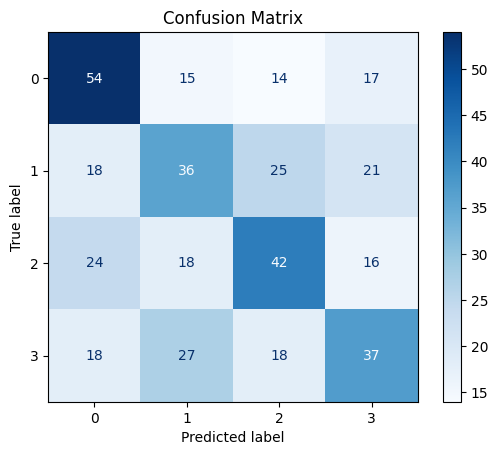


Weighted Precision: 0.420, Recall: 0.422, F1-score: 0.420


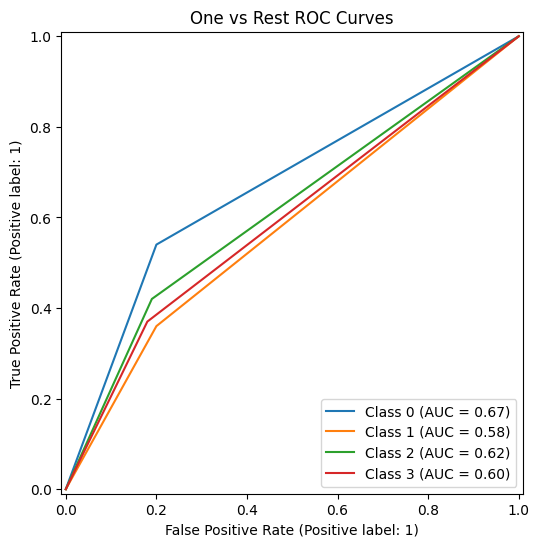

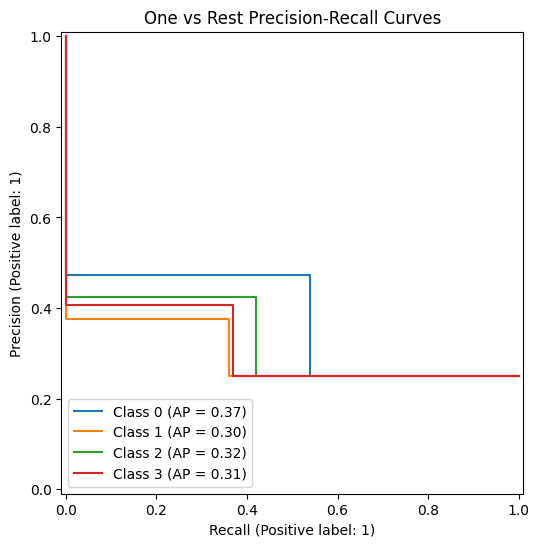

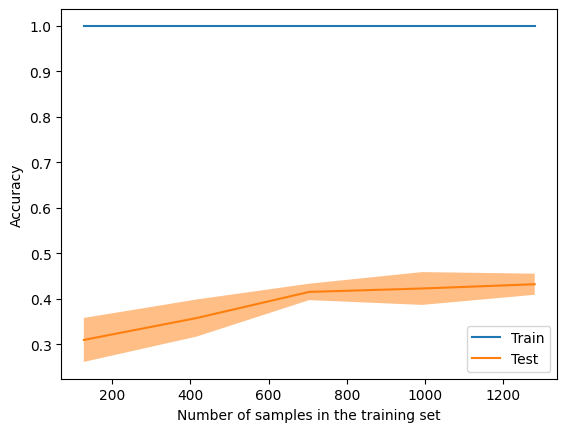

In [ ]:
dt_base_unscaled_metrics = evaluate_classifier(dt_base_unscaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
# overfit 100%

all_base_unscaled_models_metrics['Base Decision Tree(unscaled)'] = dt_base_unscaled_metrics

### Random Forest

In [ ]:
rf_base_unscaled_pipe = build_classification_pipeline(binary_features,ordinal_features,False,RandomForestClassifier(random_state = 17))

In [ ]:
rf_base_unscaled_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', 'passthrough',
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'three_g', 'touch_screen',
                                                   'wifi', 'has_fc', 'has_pc',
                                                   'multicore_processor']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'HD',
                                                                              'HD'],
                                                                             ['upto '
                                                                              '1GHz',
                                                                              'upto '
                                                                              '1.5GHz',
                                                                              'upto '
                                                                              '2GHz',
                                                                              'upto '
                                                                              '2.5GHz',
                                                                              'upto '
                                                                              '3.0GHz'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP']]),
                                                  ['screen_quality', 'speed',
                                                   'primary_camera',
                                                   'front_camera'])])),
                ('classifier', RandomForestClassifier

Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.64      0.57       100
           1       0.41      0.33      0.37       100
           2       0.50      0.38      0.43       100
           3       0.41      0.48      0.44       100

    accuracy                           0.46       400
   macro avg       0.46      0.46      0.45       400
weighted avg       0.46      0.46      0.45       400



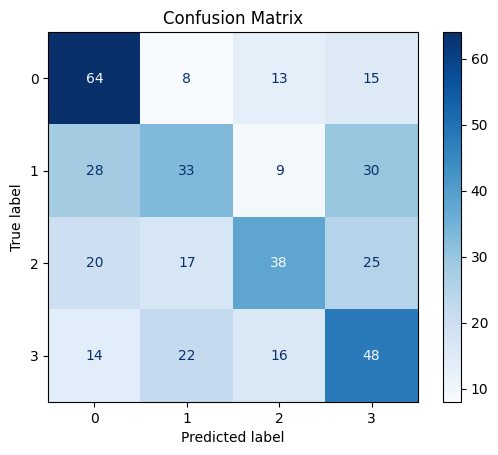


Weighted Precision: 0.457, Recall: 0.458, F1-score: 0.451


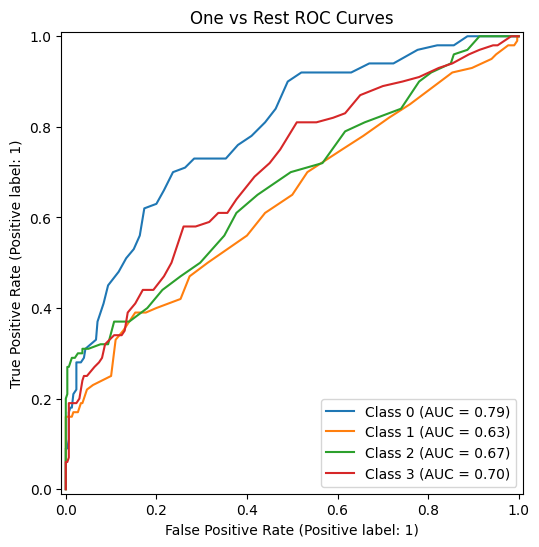

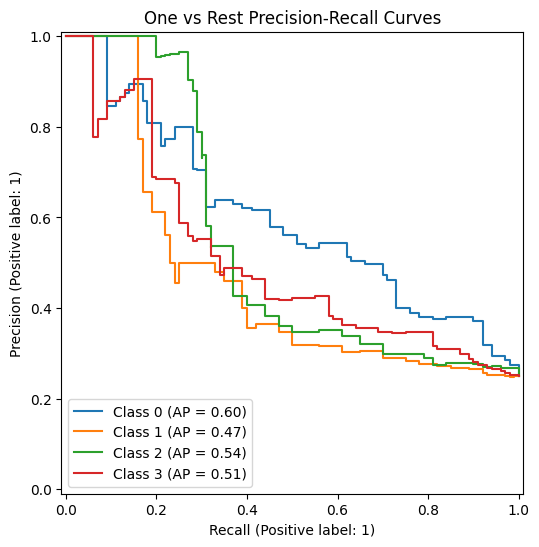

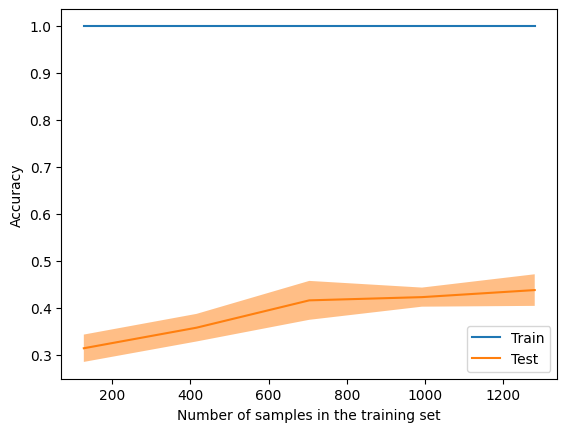

In [ ]:
rf_base_unscaled_metrics = evaluate_classifier(rf_base_unscaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
# overfit 100%

all_base_unscaled_models_metrics['Base Random Forest(unscaled)'] = rf_base_unscaled_metrics

### Xgboost

In [ ]:
xgboost_base_unscaled_pipe = build_classification_pipeline(binary_features,ordinal_features,False,xgboost.XGBClassifier(random_state = 17))

In [ ]:
xgboost_base_unscaled_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', 'passthrough',
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'three_g', 'touch_screen',
                                                   'wifi', 'has_fc', 'has_pc',
                                                   'multicore_processor']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'HD',
                                                                              'HD'],
                                                                             ['upto '
                                                                              '1GHz',
                                                                              'upto '
                                                                              '1.5GHz',
                                                                              'upto '
                                                                              '2GHz',
                                                                              'upto '
                                                                              '2.5GHz',
                                                                              'upto '
                                                                              '3.0GHz'],
                                                                             ['No '
                                                                              'Ca...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.54      0.53       100
           1       0.35      0.37      0.36       100
           2       0.42      0.43      0.42       100
           3       0.42      0.37      0.39       100

    accuracy                           0.43       400
   macro avg       0.43      0.43      0.43       400
weighted avg       0.43      0.43      0.43       400



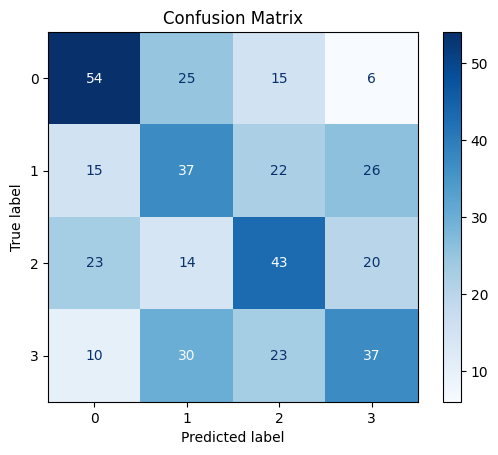


Weighted Precision: 0.428, Recall: 0.427, F1-score: 0.427


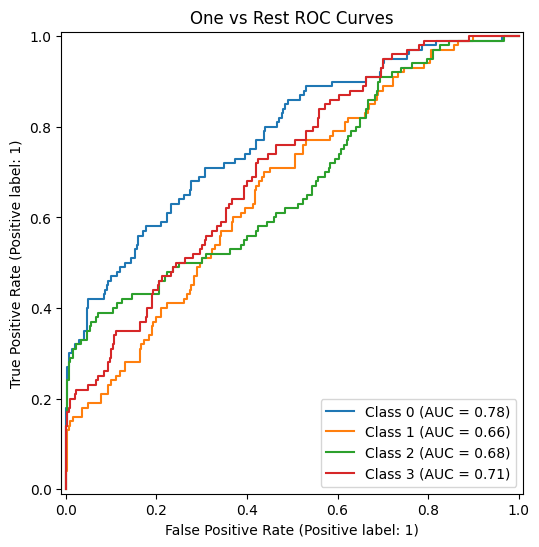

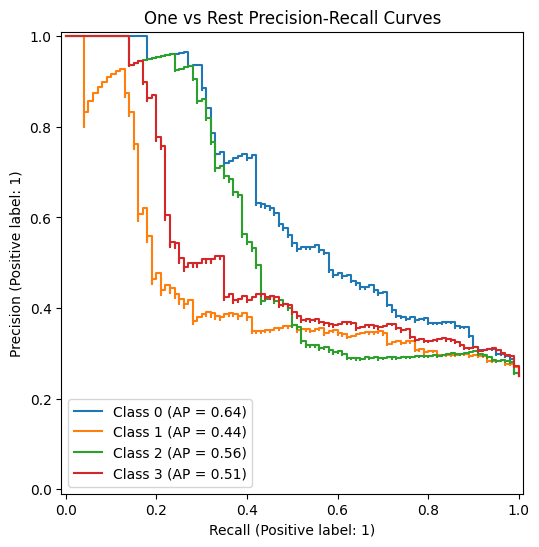

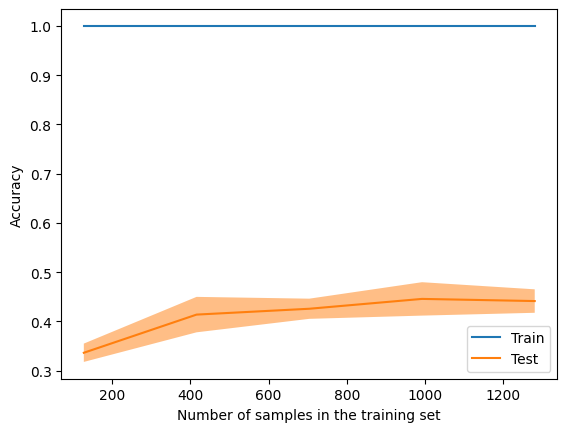

In [ ]:
xgboost_base_unscaled_metrics = evaluate_classifier(xgboost_base_unscaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
all_base_unscaled_models_metrics['Base Xgboost(unscaled)'] = xgboost_base_unscaled_metrics

## Base models (scaled)

In [ ]:
def build_classification_pipeline_with_scalers(
    df,  # pass the full dataframe to auto-detect numeric features
    binary_features,
    ordinal_features,
    numeric_features=None,  # optional, if None will auto-detect
    classifier=None,
    scale_option="none",  # "none", "standard", "grid"
    use_gridsearch=False,
    param_grid=None,
    cv=StratifiedKFold(n_splits=3,random_state = 17,shuffle = True),
    scoring="accuracy",
    n_jobs=-1
):

    if classifier is None:
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(max_iter=1000)

    # ordinal transformer
    ordinal_transformer = OrdinalEncoder(categories=list(ordinal_features.values()))

    # auto detect numeric features if not provided
    if numeric_features is None:
        numeric_features = [col for col in df.columns
                            if col not in binary_features and col not in ordinal_features.keys()]

    # numeric transformer
    if scale_option == "none":
        numeric_transformer = "passthrough"
    elif scale_option == "standard":
        numeric_transformer = StandardScaler()
    elif scale_option == "grid":
        #placeholder; actual scalers will be added via param_grid
        #numeric_transformer = FunctionTransformer(validate=False)
        numeric_transformer = "passthrough"
    else:
        raise ValueError("scale_option must be 'none', 'standard', or 'grid'")

    # preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ("binary", "passthrough", binary_features),
            ("ordinal", ordinal_transformer, list(ordinal_features.keys())),
            ("numeric", numeric_transformer, numeric_features)
        ]
    )

    # pipeline
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    # grid search
    if use_gridsearch:
        if param_grid is None:
            param_grid = {}
        if scale_option == "grid":
            param_grid["preprocessor__numeric"] = [
                StandardScaler(), MinMaxScaler(), RobustScaler(), "passthrough"
            ]
        return GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs)
    else:
        return pipe


In [ ]:
all_base_scaled_models_metrics = {}

### Logistic Regression (scaled)

In [ ]:
log_reg_base_scaled_pipe = build_classification_pipeline(binary_features,ordinal_features,True,LogisticRegression(max_iter=10000,random_state = 17))

In [ ]:
log_reg_base_scaled_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('binary', 'passthrough',
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'three_g', 'touch_screen',
                                                   'wifi', 'has_fc', 'has_pc',
                                                   'multicore_processor']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'HD',
                                                                              'HD'],
                                                                             ['upto '
                                                                              '1GHz',
                                                                              'upto '
                                                                              '1.5GHz',
                                                                              'upto '
                                                                              '2GHz',
                                                                              'upto '
                                                                              '2.5GHz',
                                                                              'upto '
                                                                              '3.0GHz'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP']]),
                                                  ['screen_quality', 'speed',
                                                   'primary_camera',
                                                   'front_camera'])])),
                ('classifier',
                 Lo

Classification Report:

              precision    recall  f1-score   support

           0       0.43      0.44      0.44       100
           1       0.26      0.21      0.23       100
           2       0.32      0.26      0.29       100
           3       0.38      0.51      0.43       100

    accuracy                           0.35       400
   macro avg       0.35      0.35      0.35       400
weighted avg       0.35      0.35      0.35       400



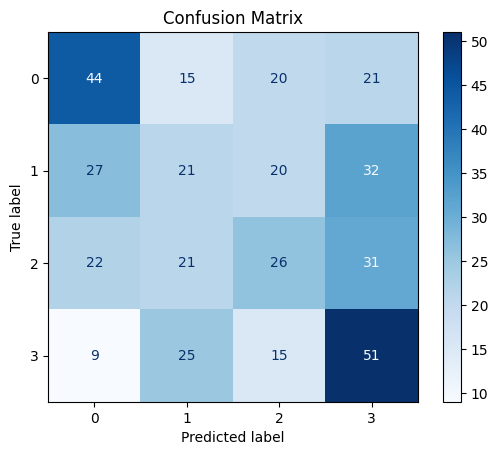


Weighted Precision: 0.347, Recall: 0.355, F1-score: 0.347


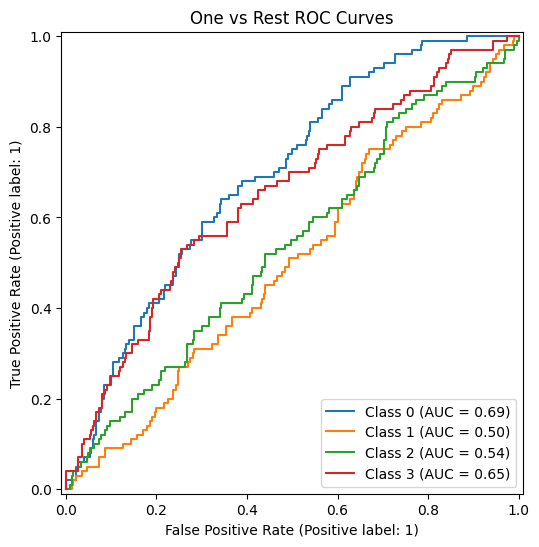

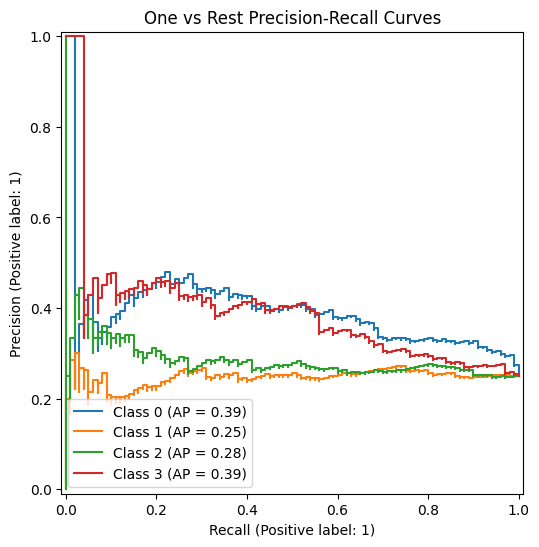

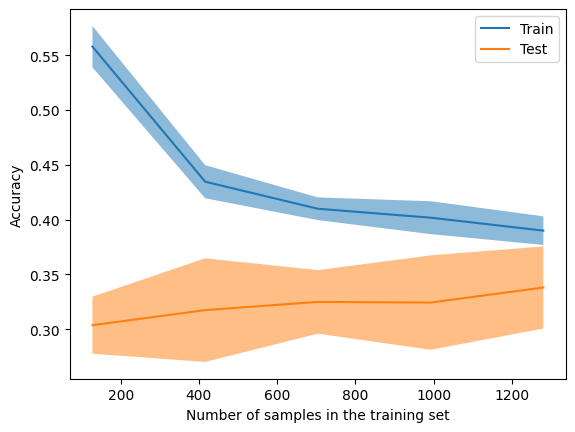

In [ ]:
log_reg_base_scaled_metrics = evaluate_classifier(log_reg_base_scaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
all_base_scaled_models_metrics['Base Logistic Regression(scaled)'] = log_reg_base_scaled_metrics

### KNN (scaled)

In [ ]:
knn_base_scaled_pipe = build_classification_pipeline(binary_features,ordinal_features,True,KNeighborsClassifier())

In [ ]:
knn_base_scaled_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('binary', 'passthrough',
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'three_g', 'touch_screen',
                                                   'wifi', 'has_fc', 'has_pc',
                                                   'multicore_processor']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'HD',
                                                                              'HD'],
                                                                             ['upto '
                                                                              '1GHz',
                                                                              'upto '
                                                                              '1.5GHz',
                                                                              'upto '
                                                                              '2GHz',
                                                                              'upto '
                                                                              '2.5GHz',
                                                                              'upto '
                                                                              '3.0GHz'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP'],
                                                                             ['No '
                                                                              'Camera',
                                                                              'upto '
                                                                              '4MP',
                                                                              'upto '
                                                                              '8MP',
                                                                              'upto '
                                                                              '12MP',
                                                                              'upto '
                                                                              '16MP',
                                                                              'upto '
                                                                              '20MP']]),
                                                  ['screen_quality', 'speed',
                                                   'primary_camera',
                                                   'front_camera'])])),
                ('classifier', KNeighborsClassifie

Classification Report:

              precision    recall  f1-score   support

           0       0.39      0.53      0.45       100
           1       0.21      0.21      0.21       100
           2       0.22      0.18      0.20       100
           3       0.27      0.22      0.24       100

    accuracy                           0.28       400
   macro avg       0.27      0.28      0.27       400
weighted avg       0.27      0.28      0.27       400



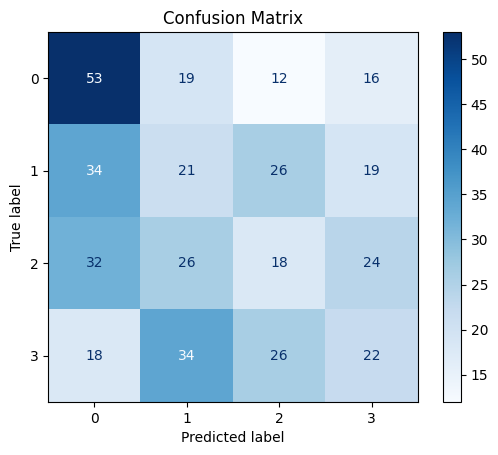


Weighted Precision: 0.272, Recall: 0.285, F1-score: 0.275


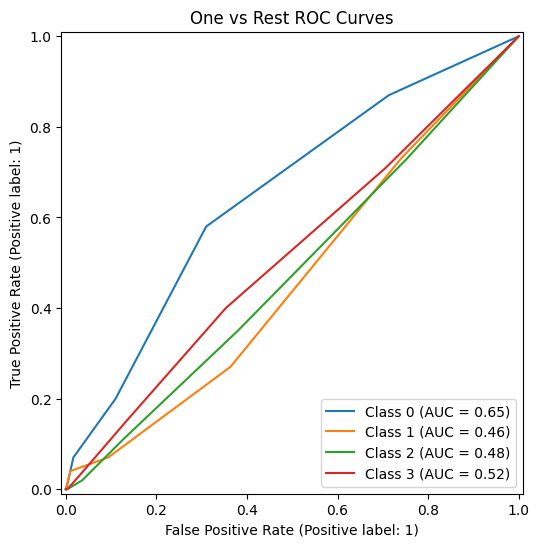

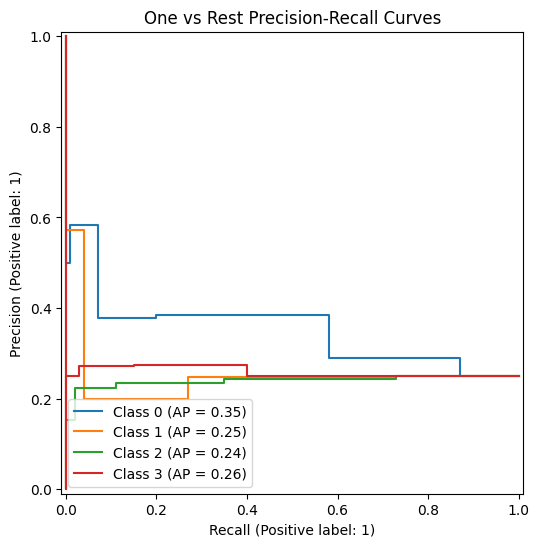

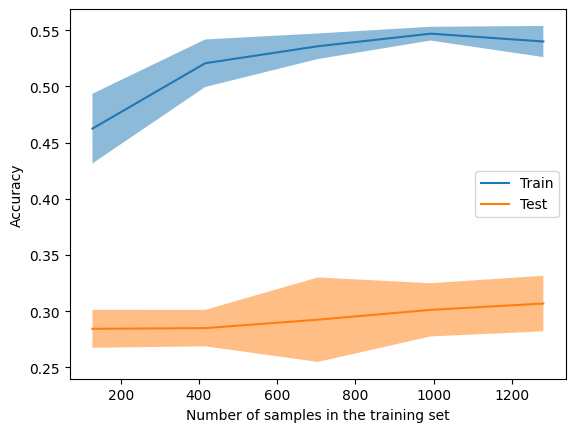

In [ ]:
knn_base_scaled_metrics = evaluate_classifier(knn_base_scaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
all_base_scaled_models_metrics['Base KNN(scaled)'] = knn_base_scaled_metrics

### SVM (scaled)

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.50      0.46       100
           1       0.23      0.18      0.20       100
           2       0.34      0.23      0.28       100
           3       0.34      0.46      0.39       100

    accuracy                           0.34       400
   macro avg       0.33      0.34      0.33       400
weighted avg       0.33      0.34      0.33       400



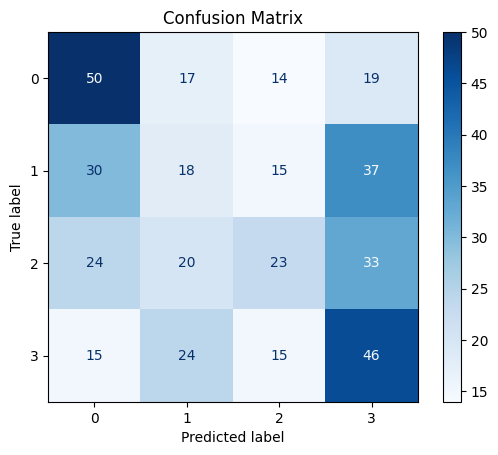


Weighted Precision: 0.333, Recall: 0.343, F1-score: 0.331


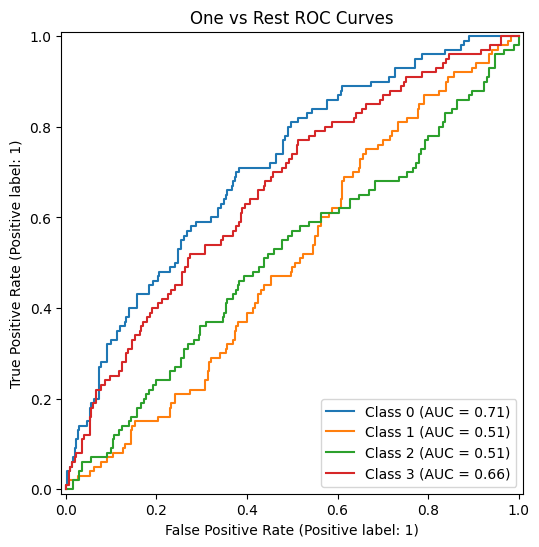

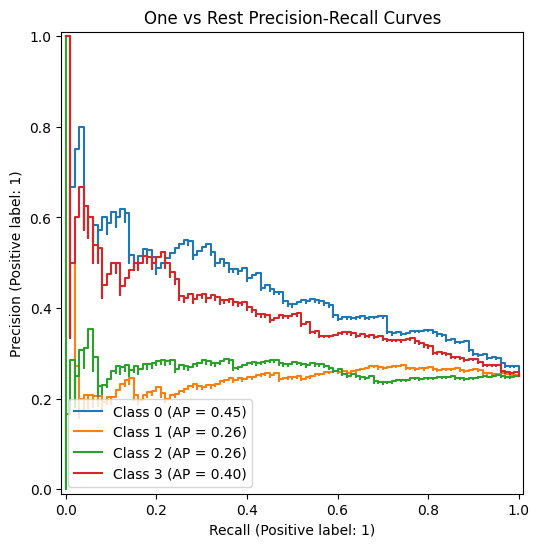

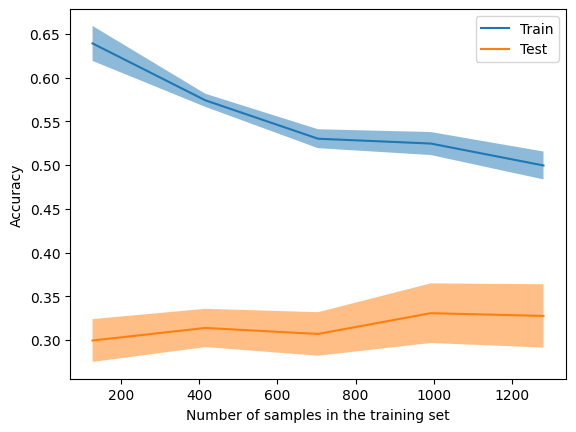

In [ ]:
svc_base_scaled_pipe = build_classification_pipeline(binary_features,ordinal_features,True,SVC(probability=True,random_state=17))
svc_base_scaled_pipe.fit(X_train,y_train)
svc_base_scaled_metrics = evaluate_classifier(svc_base_scaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
all_base_scaled_models_metrics['Base SVM(scaled)'] = svc_base_scaled_metrics

### Decision Tree (scaled)

Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.54      0.50       100
           1       0.37      0.35      0.36       100
           2       0.42      0.42      0.42       100
           3       0.41      0.38      0.40       100

    accuracy                           0.42       400
   macro avg       0.42      0.42      0.42       400
weighted avg       0.42      0.42      0.42       400



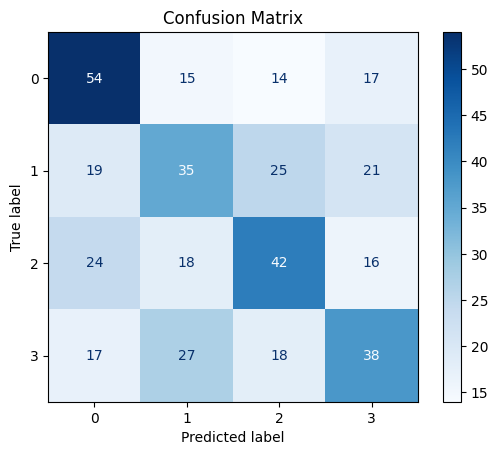


Weighted Precision: 0.420, Recall: 0.422, F1-score: 0.420


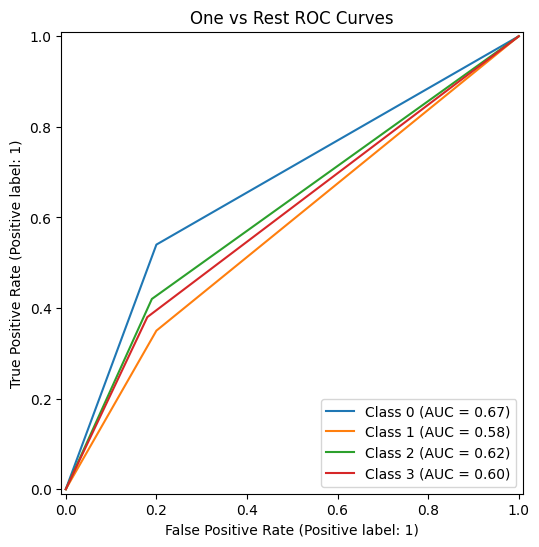

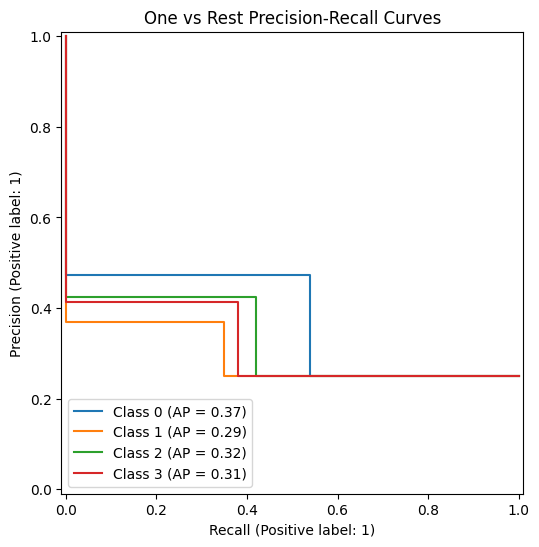

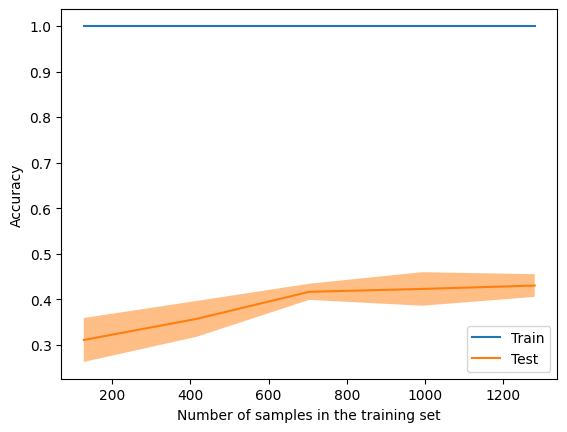

In [ ]:
dt_base_scaled_pipe = build_classification_pipeline(binary_features,ordinal_features,True,DecisionTreeClassifier(random_state = 17))
dt_base_scaled_pipe.fit(X_train,y_train)
dt_base_scaled_metrics = evaluate_classifier(dt_base_scaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
# Pristup classifier-u iz pipeline-a
dt_clf = dt_base_scaled_pipe.named_steps['classifier']

# Dubina stabla
print("Max depth:", dt_clf.get_depth())

# Broj listova
print("Number of leaves:", dt_clf.get_n_leaves())


Max depth: 13
Number of leaves: 156


In [ ]:
all_base_scaled_models_metrics['Base Decision Tree(scaled)'] = dt_base_scaled_metrics

### Random Forest (scaled)

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.64      0.56       100
           1       0.40      0.32      0.35       100
           2       0.49      0.37      0.42       100
           3       0.40      0.46      0.43       100

    accuracy                           0.45       400
   macro avg       0.45      0.45      0.44       400
weighted avg       0.45      0.45      0.44       400



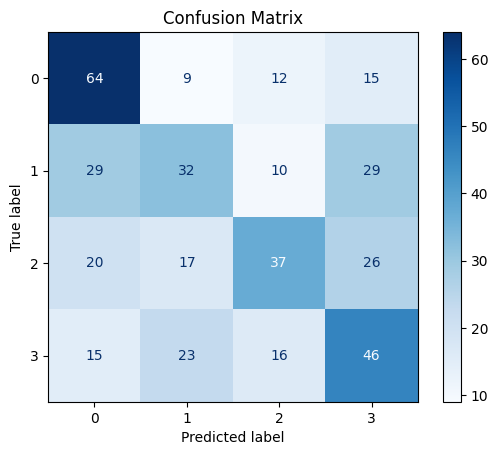


Weighted Precision: 0.446, Recall: 0.448, F1-score: 0.441


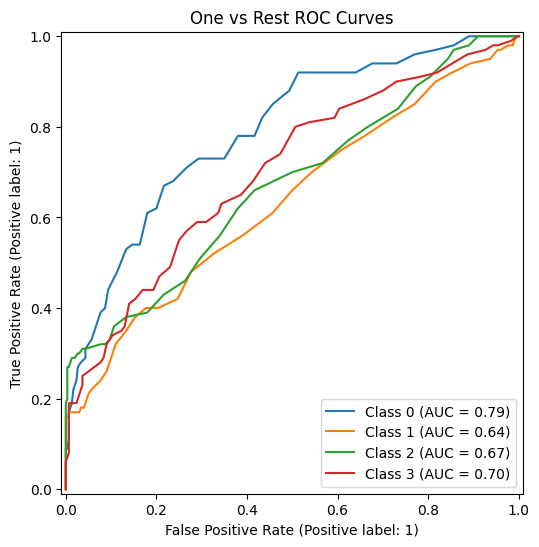

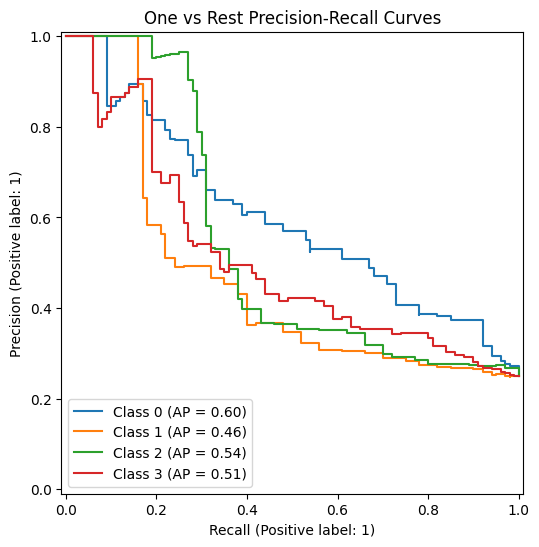

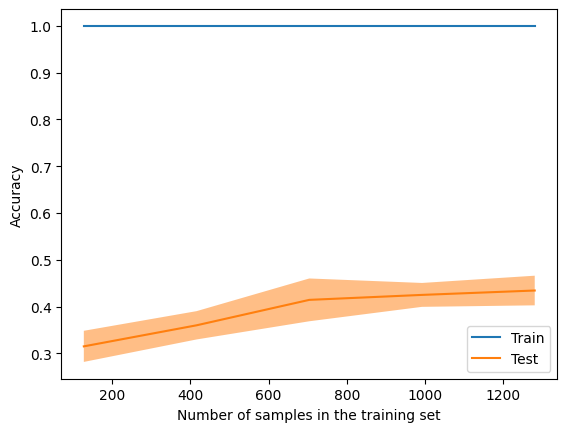

In [ ]:
rf_base_scaled_pipe = build_classification_pipeline(binary_features,ordinal_features,True,RandomForestClassifier(random_state = 17))
rf_base_scaled_pipe.fit(X_train,y_train)
rf_base_scaled_metrics = evaluate_classifier(rf_base_scaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
all_base_scaled_models_metrics['Base Random Forest(scaled)'] = rf_base_scaled_metrics

### Xgboost (scaled)

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.54      0.53       100
           1       0.35      0.37      0.36       100
           2       0.42      0.43      0.42       100
           3       0.42      0.37      0.39       100

    accuracy                           0.43       400
   macro avg       0.43      0.43      0.43       400
weighted avg       0.43      0.43      0.43       400



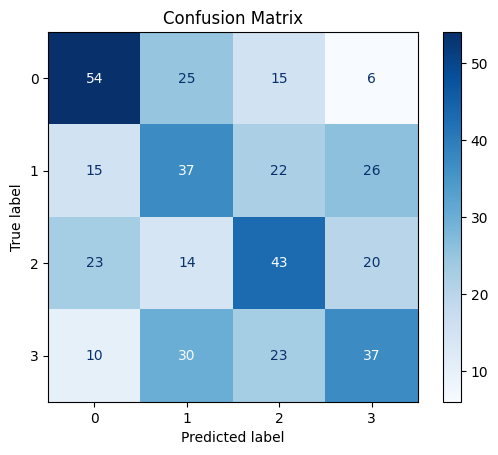


Weighted Precision: 0.428, Recall: 0.427, F1-score: 0.427


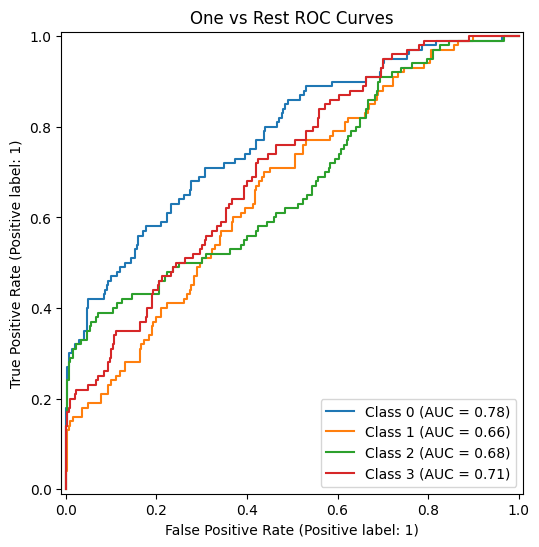

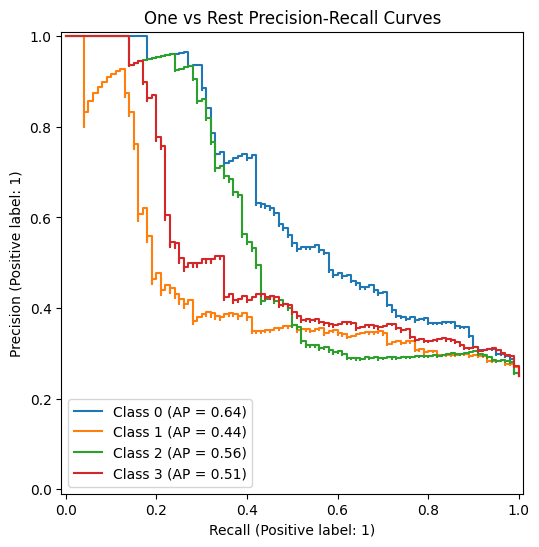

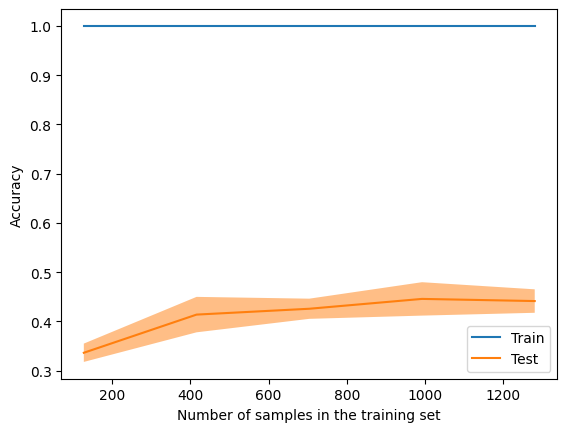

In [ ]:
xgboost_base_scaled_pipe = build_classification_pipeline(binary_features,ordinal_features,True,XGBClassifier(random_state = 17))
xgboost_base_scaled_pipe.fit(X_train,y_train)
xgboost_base_scaled_metrics = evaluate_classifier(xgboost_base_scaled_pipe, X_train, y_train, X_test, y_test)

In [ ]:
all_base_scaled_models_metrics['Base Xgboost(scaled)'] = xgboost_base_scaled_metrics

## Base models sensitive to scaling (with different scalers)

In [ ]:
all_base_scaled_distance_models_metrics = {}

### Logistic Regression (with different scalers)

In [ ]:
log_reg_base_different_scalers = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=LogisticRegression(max_iter=10000,random_state = 17),
    scale_option="grid",
    use_gridsearch=True  # samo za scalere
)

log_reg_base_different_scalers.fit(X_train, y_train)

print("Best scaler used:", log_reg_base_different_scalers.best_params_["preprocessor__numeric"])

log_reg_base_different_scalers_metrics = evaluate_classifier(
    log_reg_base_different_scalers,
    X_train, y_train, X_test, y_test,
    show_top_n=5,
)

In [ ]:
all_base_scaled_distance_models_metrics['Base Logistic Regression(different scalers)'] = log_reg_base_different_scalers_metrics

### KNN (with different scalers)

In [ ]:
knn_base_different_scalers = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=KNeighborsClassifier(),
    scale_option="grid",
    use_gridsearch=True  # samo za scalere
)

knn_base_different_scalers.fit(X_train, y_train)

print("Best scaler used:", knn_base_different_scalers.best_params_["preprocessor__numeric"])

knn_base_different_scalers_metrics = evaluate_classifier(
    log_reg_base_different_scalers,
    X_train, y_train, X_test, y_test,
    show_top_n=5,
)

In [ ]:
best_est = knn_base_different_scalers.best_estimator_
print(best_est.named_steps["preprocessor"].named_transformers_["numeric"])


FunctionTransformer(accept_sparse=True, check_inverse=False,
                    feature_names_out='one-to-one')


In [ ]:
all_base_scaled_distance_models_metrics['Base KNN(different scalers)'] = knn_base_different_scalers_metrics

### SVM (with different scalers)

Best scaler used: passthrough
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.94      0.94      0.94       100
           2       0.95      0.89      0.92       100
           3       0.93      0.96      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



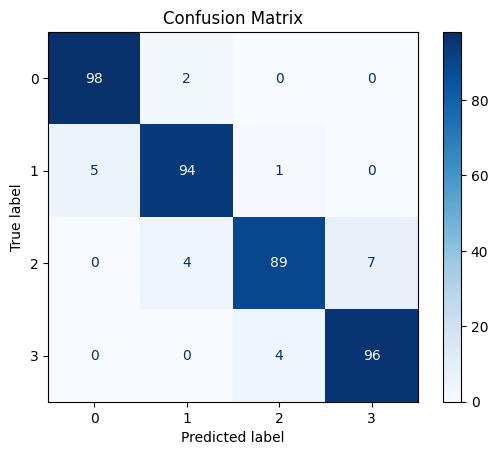


Weighted Precision: 0.943, Recall: 0.943, F1-score: 0.942


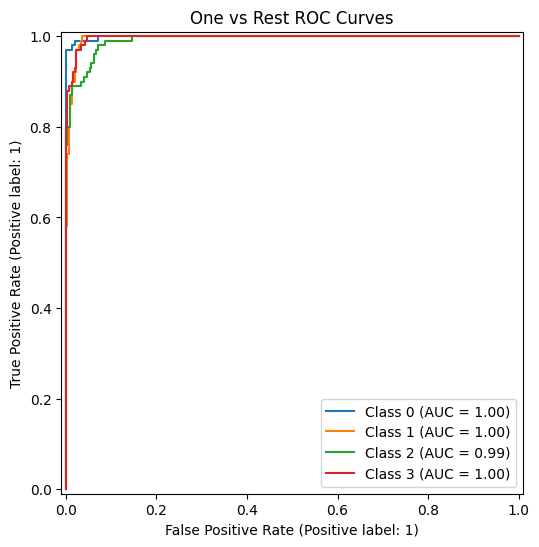

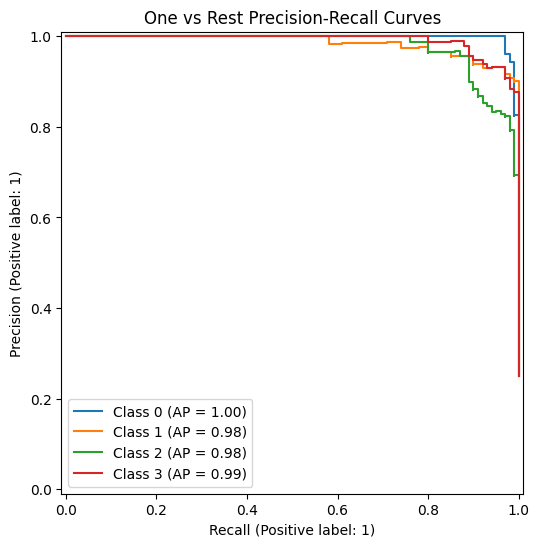

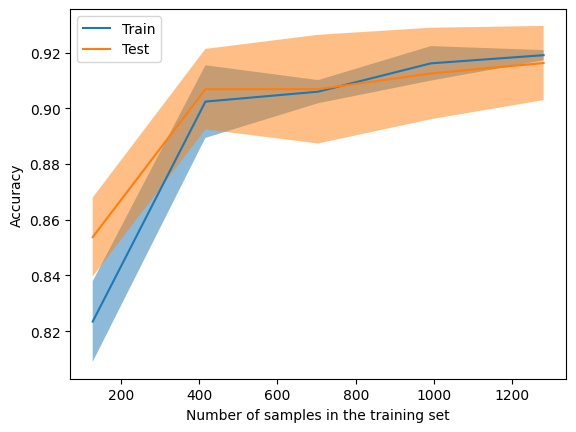


Top 5 GridSearchCV candidates:


mean_test_score  std_test_score  \
3         0.916250        0.013317   
0         0.863125        0.014577   
2         0.803750        0.020291   
1         0.749375        0.014443   

                                        params  
3     {'preprocessor__numeric': 'passthrough'}  
0  {'preprocessor__numeric': StandardScaler()}  
2    {'preprocessor__numeric': RobustScaler()}  
1    {'preprocessor__numeric': MinMaxScaler()}

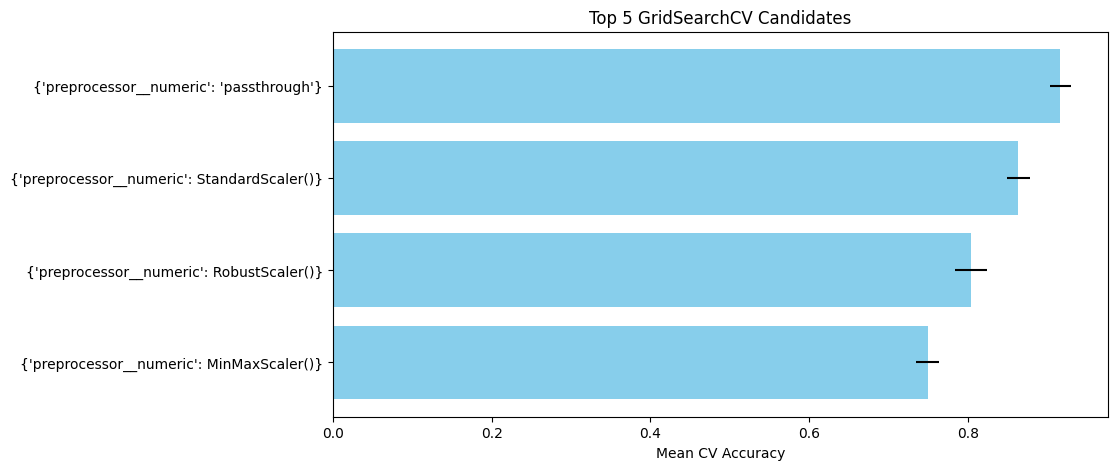

In [ ]:
svc_base_different_scalers = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=True,random_state=17),
    scale_option="grid",
    use_gridsearch=True  # samo za scalere
)

svc_base_different_scalers.fit(X_train, y_train)

print("Best scaler used:", svc_base_different_scalers.best_params_["preprocessor__numeric"])

svc_base_different_scalers_metrics = evaluate_classifier(
    svc_base_different_scalers,
    X_train, y_train, X_test, y_test,
    show_top_n=5,
)

In [ ]:
all_base_scaled_distance_models_metrics['Base SVM(different scalers)'] = svc_base_different_scalers_metrics

## Hyperparameter tuning

### Logistic Regression

In [ ]:
all_tuned_models_metrics = {}

Best hyperparameters:
{'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       500
           1       0.68      0.67      0.67       500
           2       0.67      0.66      0.66       500
           3       0.83      0.85      0.84       500

    accuracy                           0.76      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.75      0.76      0.76      2000



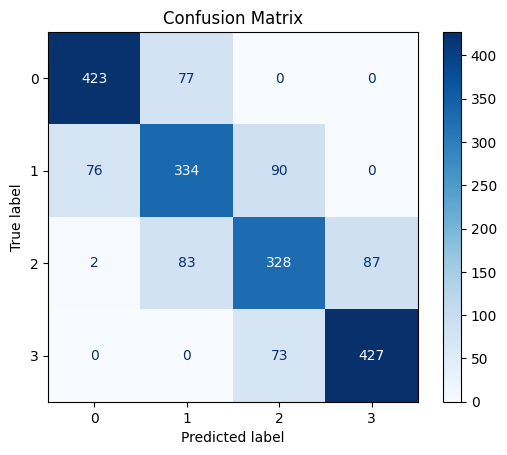


Weighted Precision: 0.755, Recall: 0.756, F1-score: 0.755


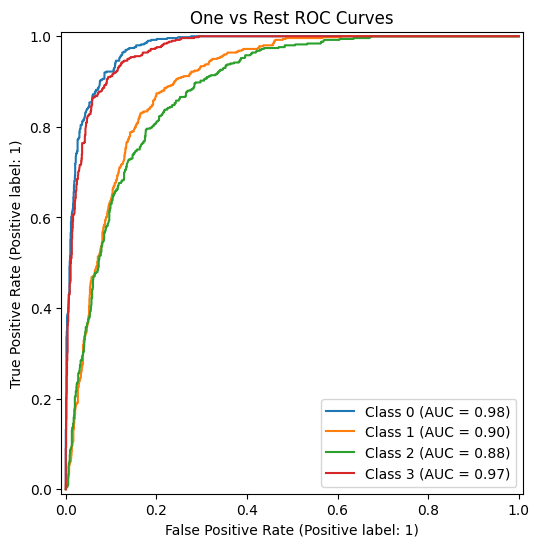

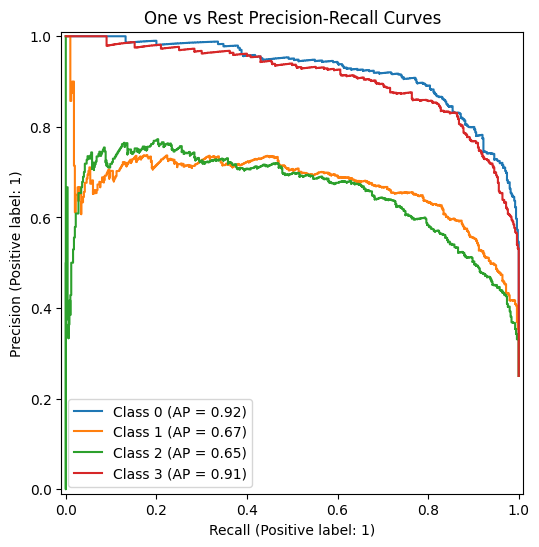

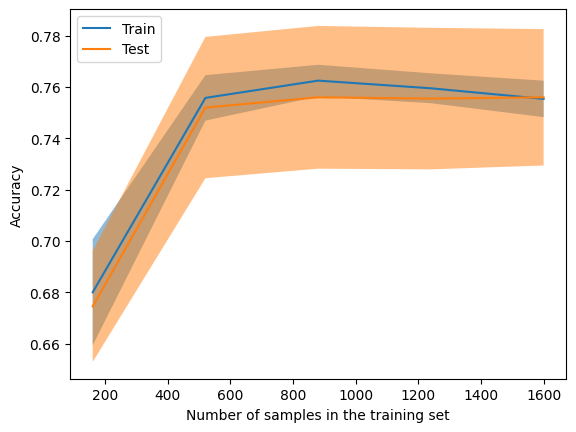

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# X i y
X = df[["ram"]]  # DataFrame 2D
y = df["price_range"]

# kompatibilan param_grid za SAGA sa 1 numeričkom kolonom
param_grid_log_reg_saga_safe = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],  # elasticnet izbačen
    'classifier__solver': ['saga'],
}

# Build pipeline (nema binary ni ordinal features)
lr_pipeline = build_classification_pipeline_with_scalers(
    df=X,
    binary_features=[],
    ordinal_features={},
    scale_option="standard",  # standardizujemo ram
    classifier=LogisticRegression(max_iter=2000, random_state=17),
    use_gridsearch=True,
    param_grid=param_grid_log_reg_saga_safe,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
lr_pipeline.fit(X, y)

# Dobij najbolju kombinaciju
print("Best hyperparameters:")
print(lr_pipeline.best_params_)

# Evaluacija
log_reg_best_metrics = evaluate_classifier(
    lr_pipeline.best_estimator_,
    X, y,  # možeš dodati test set ako imaš
    X, y,
    show_top_n=5
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# X_train i y_train
# Pretpostavka: binary_features i ordinal_features su već definirani

# Funkcija koja kreira param_grid kompatibilan s l1_ratio
def create_safe_param_grid():
    param_grid = [
        {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['saga']
        },
        {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__solver': ['saga'],
            'classifier__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        }
    ]
    return param_grid

safe_param_grid = create_safe_param_grid()

# Kreiraj pipeline
lr_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=LogisticRegression(max_iter=2000, random_state=17),
    scale_option="grid",
    use_gridsearch=True,
    param_grid=safe_param_grid,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
lr_full_pipeline.fit(X_train, y_train)

# Evaluacija
log_reg_best_saga_metrics = evaluate_classifier(
    lr_full_pipeline.best_estimator_,
    X_train, y_train,
    X_test, y_test,
    show_top_n=5
)

print("Best hyperparameters:")
print(lr_full_pipeline.best_params_)

log_reg_best_saga = lr_full_pipeline.best_estimator_
all_tuned_models_metrics['Logistic Regression - SAGA (tuned)'] = log_reg_best_saga_metrics


In [ ]:
all_tuned_models_metrics['Logistic Regression - SAGA (tuned)'].update({
    "best_params": lr_full_pipeline.best_params_
})

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.73      0.73      0.73       100
           2       0.72      0.63      0.67       100
           3       0.90      0.99      0.94       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



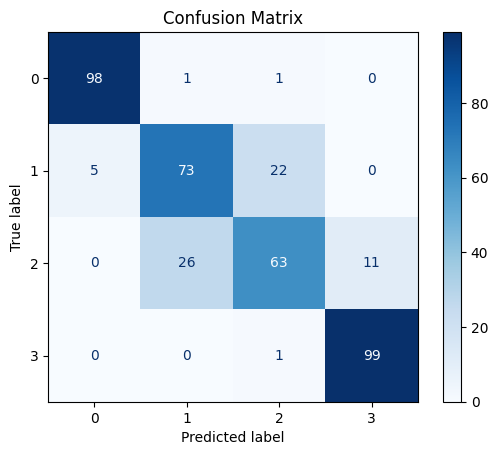


Weighted Precision: 0.826, Recall: 0.833, F1-score: 0.828


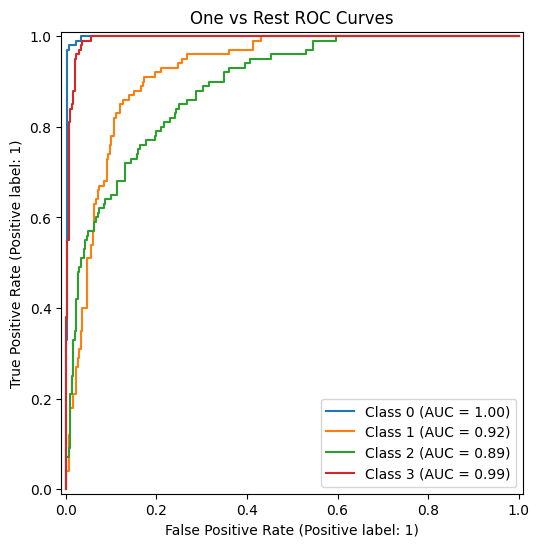

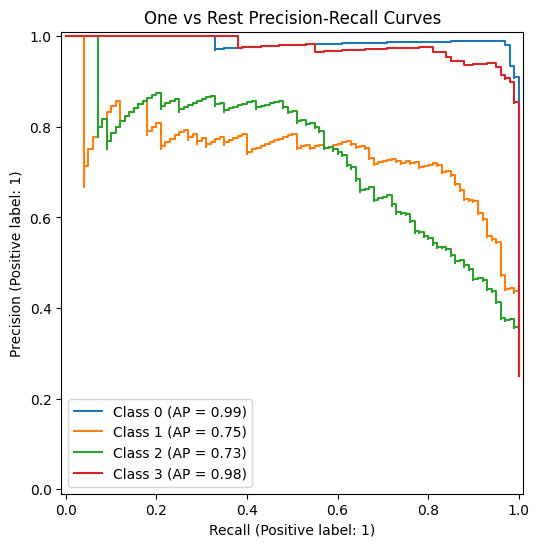

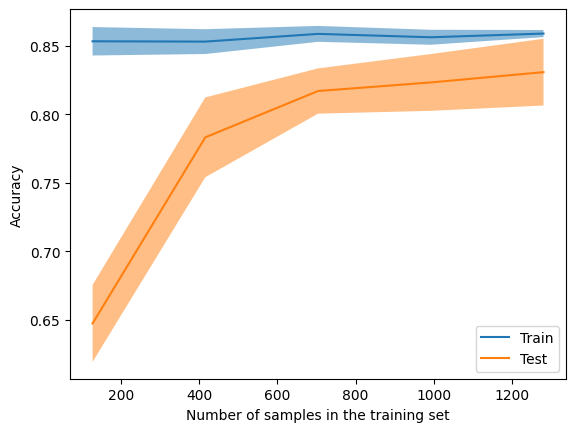

Best hyperparameters:
{'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'preprocessor__numeric': 'passthrough'}


In [ ]:
    # liblinear → one vs rest
param_grid_log_reg_liblinear = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],
}

lr_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=LogisticRegression(max_iter=2000, random_state=17),
    scale_option="grid",
    use_gridsearch=True,
    param_grid=param_grid_log_reg_liblinear,
    scoring='accuracy',
    n_jobs=-1
)

lr_full_pipeline.fit(X_train, y_train)

log_reg_best_liblinear_metrics = evaluate_classifier(
    lr_full_pipeline.best_estimator_,
    X_train, y_train,
    X_test, y_test,
    show_top_n=5
)

print("Best hyperparameters:")
print(lr_full_pipeline.best_params_)

log_reg_best_liblinear = lr_full_pipeline.best_estimator_

all_tuned_models_metrics['Logistic Regression - LIBLINEAR (tuned)'] = log_reg_best_saga_metrics

In [ ]:
all_tuned_models_metrics['Logistic Regression - LIBLINEAR (tuned)'].update({
    "best_params": lr_full_pipeline.best_params_
})

### KNN

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.42      0.42       100
           1       0.26      0.24      0.25       100
           2       0.33      0.31      0.32       100
           3       0.41      0.47      0.44       100

    accuracy                           0.36       400
   macro avg       0.36      0.36      0.36       400
weighted avg       0.36      0.36      0.36       400



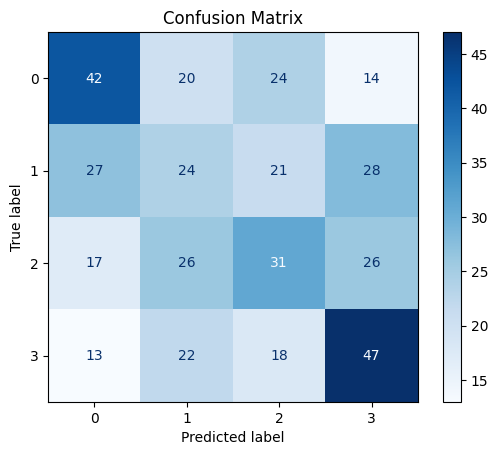


Weighted Precision: 0.356, Recall: 0.360, F1-score: 0.357


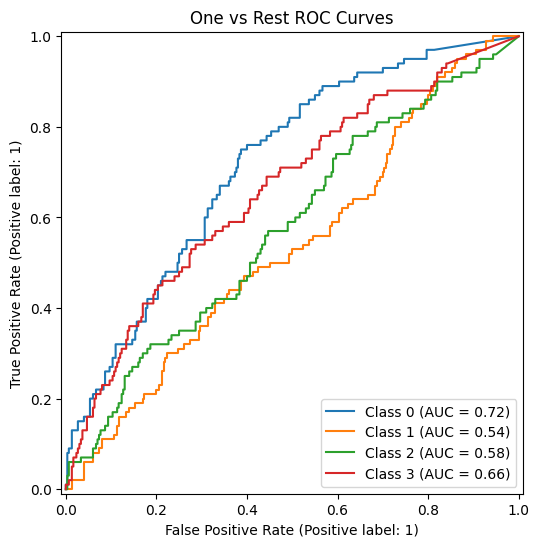

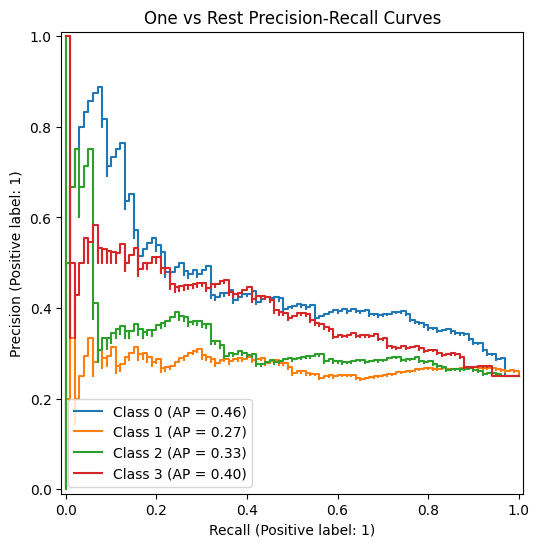

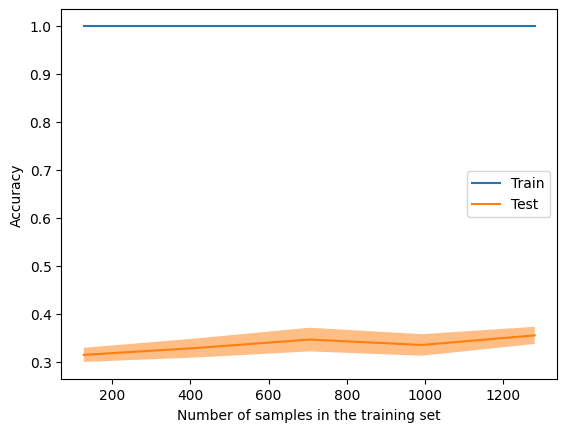

Best hyperparameters:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance', 'preprocessor__numeric': 'passthrough'}


In [ ]:
param_grid_knn={
  'classifier__n_neighbors': [1, 3, 5, 7, 9, 11],
  'classifier__weights': ['uniform', 'distance'],
  'classifier__metric': ['euclidean', 'manhattan', 'chebyshev'],
}


knn_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=KNeighborsClassifier(),
    scale_option="grid",
    use_gridsearch=True,
    param_grid = param_grid_knn,
    scoring='accuracy',
    n_jobs=-1
)

knn_full_pipeline.fit(X_train, y_train)


knn_best_metrics = evaluate_classifier(
    knn_full_pipeline.best_estimator_,
    X_train, y_train,
    X_test, y_test,
    show_top_n=5
)

print("Best hyperparameters:")
print(knn_full_pipeline.best_params_)

knn_best = knn_full_pipeline.best_estimator_

all_tuned_models_metrics['KNN(tuned)'] = knn_best_metrics

In [ ]:
all_tuned_models_metrics['KNN(tuned)'].update({
    "best_params": knn_full_pipeline.best_params_
})

### SVM

**LINEAR KERNEL**

In [ ]:
param_grid_linear = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__kernel': ['linear']
}

svc_linear_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=False,random_state=17),
    scale_option="grid",
    use_gridsearch=True,
    param_grid = param_grid_linear,
    scoring='accuracy',
    n_jobs=-1
)

svc_linear_full_pipeline.fit(X_train, y_train)

print("Best hyperparameters:")
print(svc_linear_full_pipeline.best_params_)


best_svc = svc_linear_full_pipeline.best_estimator_

calibrated_svc = CalibratedClassifierCV(best_svc, cv=3)
calibrated_svc.fit(X_train, y_train)

calibrated_svc_metrics = evaluate_classifier(calibrated_svc, X_train, y_train, X_test, y_test)

all_tuned_models_metrics['SVM - LINEAR (tuned)'] = calibrated_svc_metrics

In [ ]:
all_tuned_models_metrics['SVM - LINEAR (tuned)'].update({
    "best_params": svc_linear_full_pipeline.best_params_
})

**RADIJALNI KERNEL**

Best hyperparameters:
{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'preprocessor__numeric': 'passthrough'}
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       100
           1       0.96      0.89      0.92       100
           2       0.91      0.88      0.89       100
           3       0.91      0.95      0.93       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



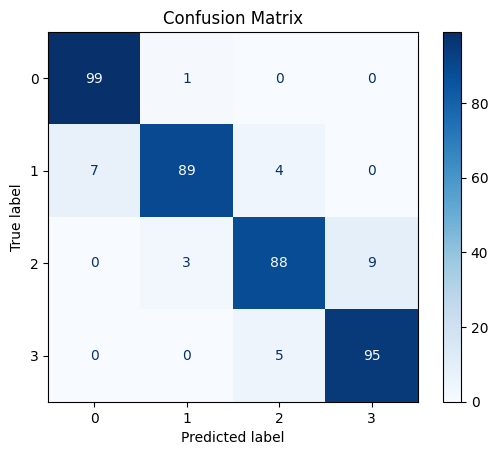


Weighted Precision: 0.928, Recall: 0.927, F1-score: 0.927


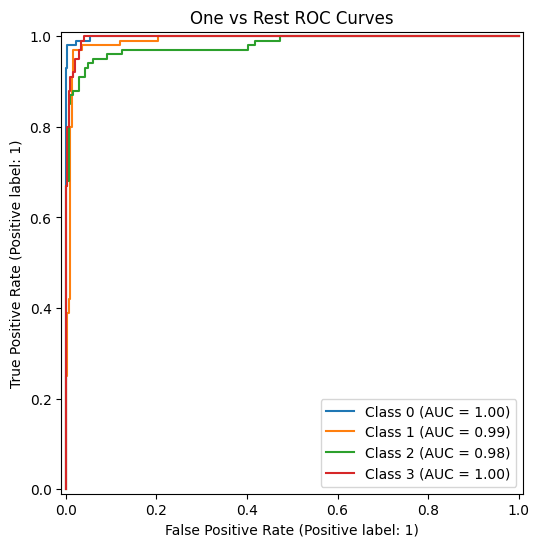

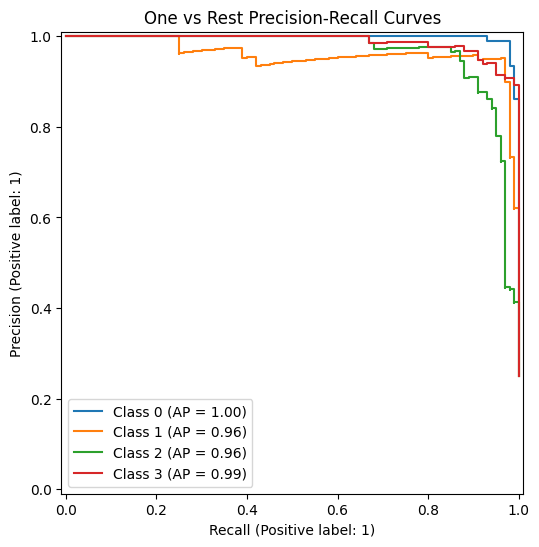

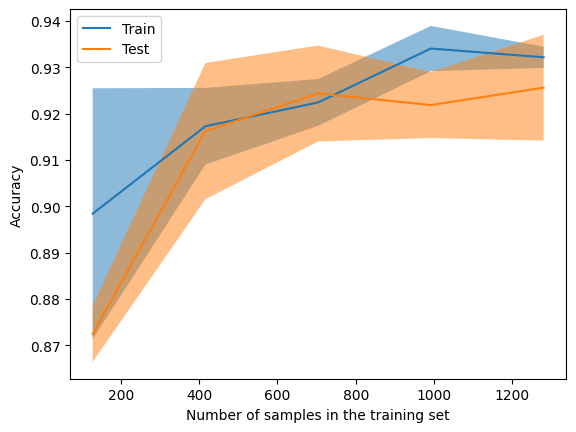

In [ ]:
param_grid_rbf = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__gamma': ['scale', 0.01, 0.1],
    'classifier__kernel': ['rbf']
}


svc_rbf_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=False,random_state=17),
    scale_option="grid",
    use_gridsearch=True,
    param_grid = param_grid_rbf,
    scoring='accuracy',
    n_jobs=-1
)

svc_rbf_full_pipeline.fit(X_train, y_train)

print("Best hyperparameters:")
print(svc_rbf_full_pipeline.best_params_)

best_svc_rbf = svc_rbf_full_pipeline.best_estimator_

# Wrap it to enable probability estimates
calibrated_svc_rbf = CalibratedClassifierCV(best_svc_rbf, cv=3)
calibrated_svc_rbf.fit(X_train, y_train)

calibrated_svc_rbf_metrics = evaluate_classifier(calibrated_svc_rbf, X_train, y_train, X_test, y_test)

all_tuned_models_metrics['SVM - RADIAL (tuned)'] = calibrated_svc_rbf_metrics


In [ ]:
all_tuned_models_metrics['SVM - RADIAL (tuned)'].update({
    "best_params": svc_rbf_full_pipeline.best_params_
})

**POLINOMIJALNI KERNEL**

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       100
           1       0.95      0.92      0.93       100
           2       0.91      0.89      0.90       100
           3       0.93      0.94      0.94       100

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.94      0.93       400



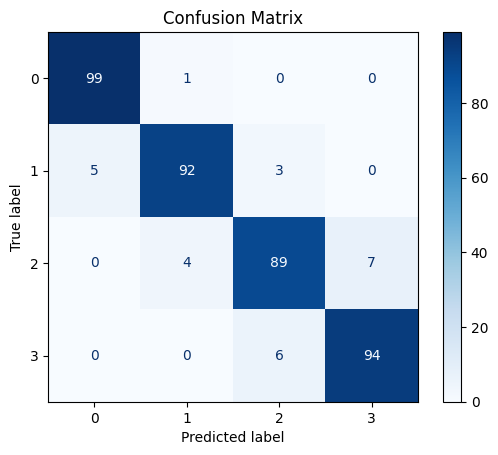


Weighted Precision: 0.935, Recall: 0.935, F1-score: 0.935


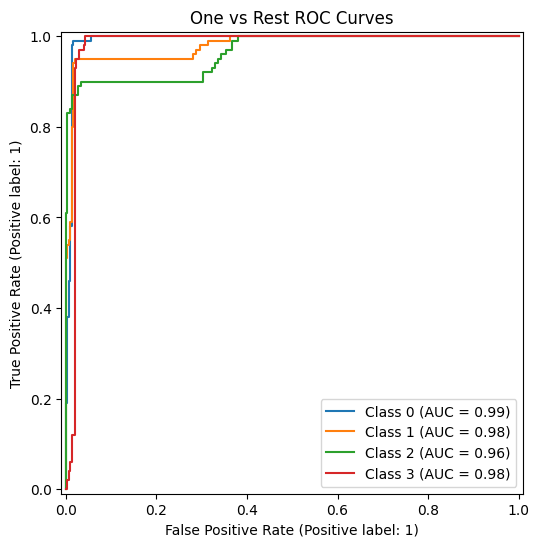

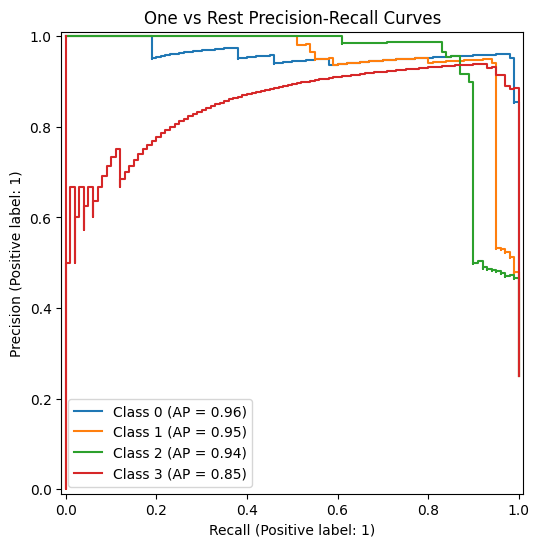

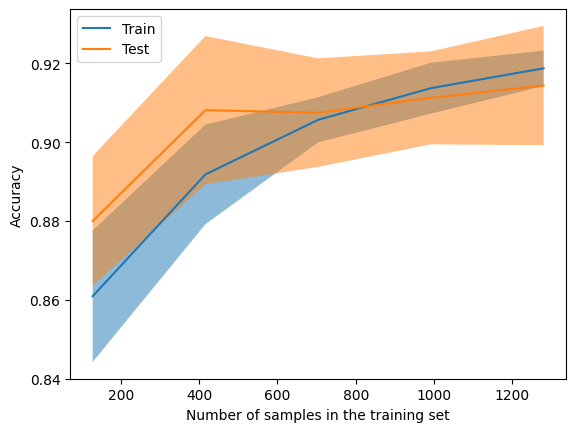

Best hyperparameters (fast):
{'classifier__C': 1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'poly', 'preprocessor__numeric': 'passthrough'}


In [ ]:
fast_param_grid_poly = {
    'classifier__C': [0.1, 1],
    'classifier__gamma': ['scale'],
    'classifier__degree': [2],
    'classifier__kernel': ['poly']
}

svc_poly_fast_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=False, random_state=17),
    scale_option="grid",
    use_gridsearch=True,
    param_grid=fast_param_grid_poly,
    scoring='accuracy',
    n_jobs=-1
)

svc_poly_fast_pipeline.fit(X_train, y_train)

best_svc_poly_fast = svc_poly_fast_pipeline.best_estimator_


calibrated_svc_poly_fast = CalibratedClassifierCV(best_svc_poly_fast, cv=3)
calibrated_svc_poly_fast.fit(X_train, y_train)

calibrated_svc_poly_fast_metrics = evaluate_classifier(
    calibrated_svc_poly_fast,
    X_train, y_train,
    X_test, y_test
)

all_tuned_models_metrics['SVM - POLY (fast, tuned)'] = calibrated_svc_poly_fast_metrics

print("Best hyperparameters (fast):")
print(svc_poly_fast_pipeline.best_params_)


In [ ]:
all_tuned_models_metrics['SVM - POLY (fast, tuned)'].update({
    "best_params": svc_poly_fast_pipeline.best_params_
})

**SIGMOID KERNEL**

Best hyperparameters:
{'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'sigmoid', 'preprocessor__numeric': StandardScaler()}
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.84      0.76      0.80       100
           2       0.74      0.81      0.78       100
           3       0.91      0.92      0.92       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



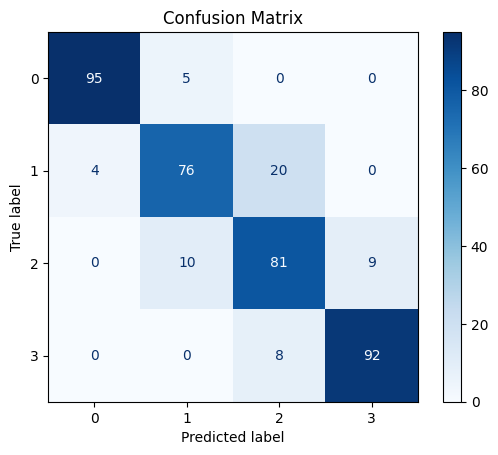


Weighted Precision: 0.862, Recall: 0.860, F1-score: 0.860


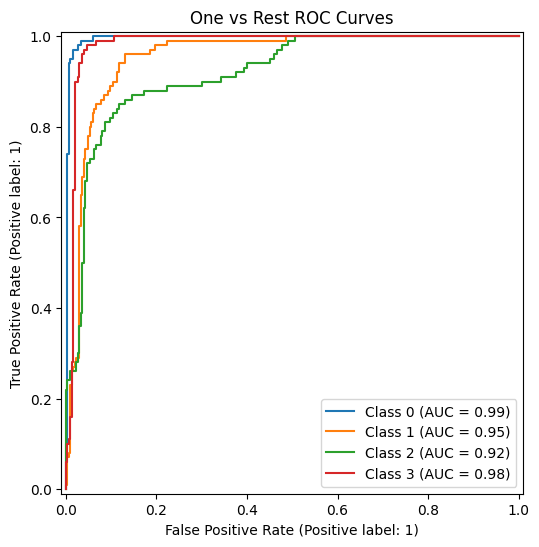

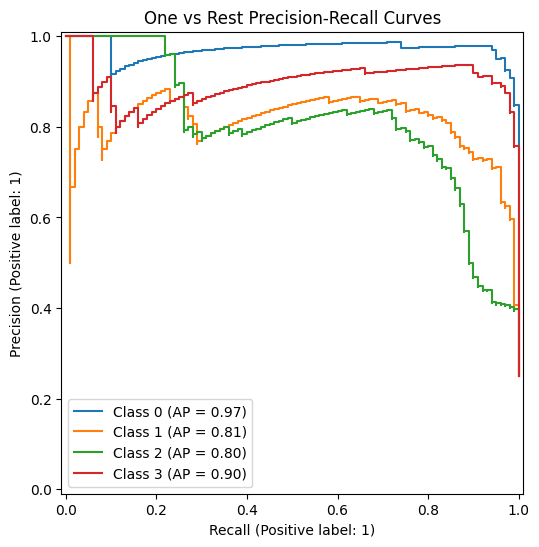

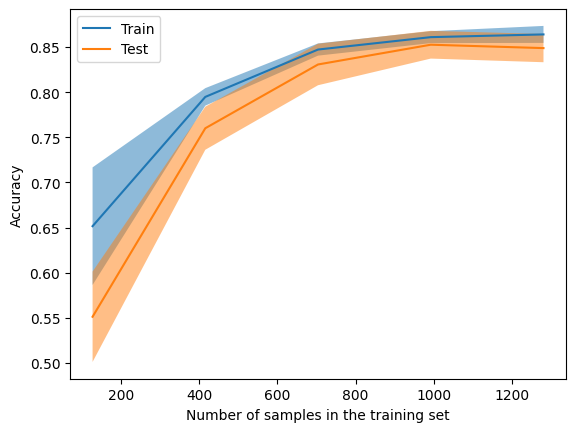

In [ ]:
param_grid_sigmoid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__gamma': ['scale', 0.01, 0.1],
    'classifier__kernel': ['sigmoid']
}


svc_sigmoid_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=False,random_state=17),
    scale_option="grid",
    use_gridsearch=True,
    param_grid = param_grid_sigmoid,
    scoring='accuracy',
    n_jobs=-1
)

svc_sigmoid_full_pipeline.fit(X_train, y_train)

print("Best hyperparameters:")
print(svc_sigmoid_full_pipeline.best_params_)

best_svc_sigmoid = svc_sigmoid_full_pipeline.best_estimator_

calibrated_svc_sigmoid = CalibratedClassifierCV(best_svc_sigmoid, cv=3)
calibrated_svc_sigmoid.fit(X_train, y_train)

calibrated_svc_sigmoid = evaluate_classifier(calibrated_svc_sigmoid, X_train, y_train, X_test, y_test)

all_tuned_models_metrics['SVM - SIGMOID (tuned)'] = calibrated_svc_sigmoid


In [ ]:
all_tuned_models_metrics['SVM - SIGMOID (tuned)'].update({
    "best_params": svc_sigmoid_full_pipeline.best_params_
})

### Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       100
           1       0.82      0.80      0.81       100
           2       0.84      0.79      0.81       100
           3       0.92      0.93      0.93       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



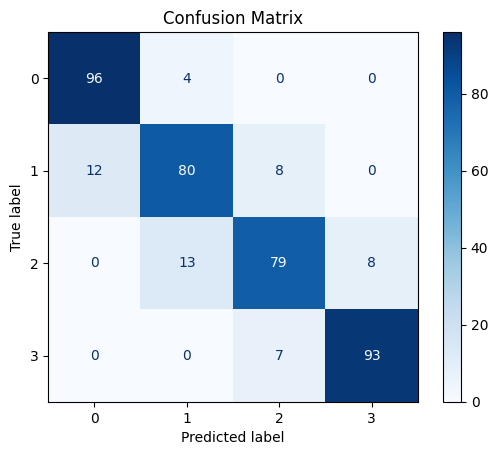


Weighted Precision: 0.869, Recall: 0.870, F1-score: 0.869


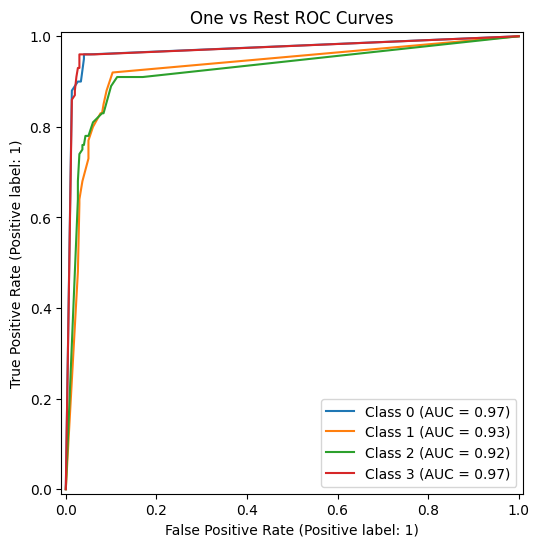

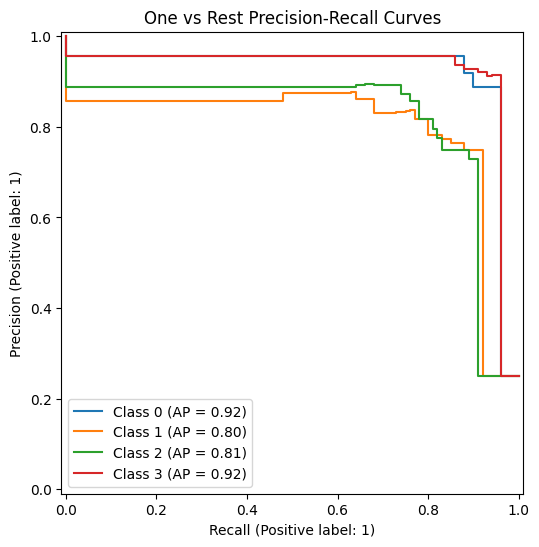

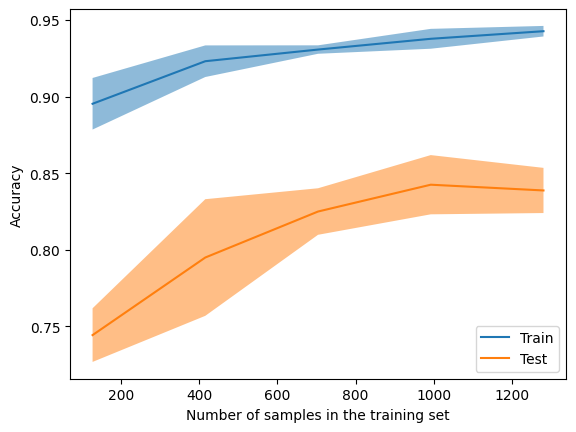

Best hyperparameters:
{'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'preprocessor__numeric': 'passthrough'}


In [ ]:
dt_param_grid = {
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [3, 5, 7, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
    'classifier__max_features': [None, 'sqrt', 'log2']
}


dt_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=DecisionTreeClassifier(random_state=17),
    scale_option="grid",
    use_gridsearch=True,
    param_grid=dt_param_grid,
    scoring='accuracy',
    n_jobs=-1
)

dt_full_pipeline.fit(X_train, y_train)

dt_best_metrics = evaluate_classifier(
    dt_full_pipeline.best_estimator_,
    X_train, y_train,
    X_test, y_test,
    show_top_n=5
)

print("Best hyperparameters:")
print(dt_full_pipeline.best_params_)

dt_best = dt_full_pipeline.best_estimator_

all_tuned_models_metrics['Decision Tree(tuned)'] = dt_best_metrics

In [ ]:
all_tuned_models_metrics['Decision Tree(tuned)'].update({
    "best_params": dt_full_pipeline.best_params_
})

### Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.61      0.55       100
           1       0.36      0.26      0.30       100
           2       0.51      0.39      0.44       100
           3       0.44      0.57      0.49       100

    accuracy                           0.46       400
   macro avg       0.45      0.46      0.45       400
weighted avg       0.45      0.46      0.45       400



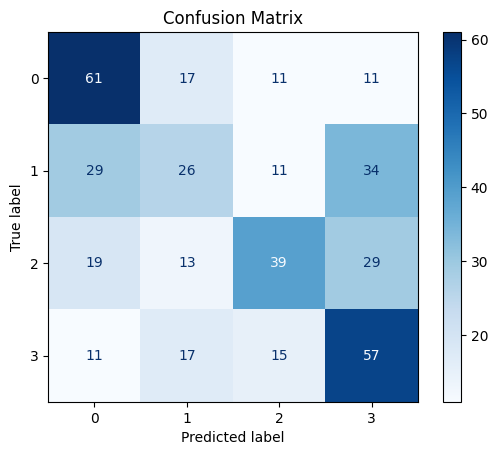


Weighted Precision: 0.453, Recall: 0.458, F1-score: 0.448


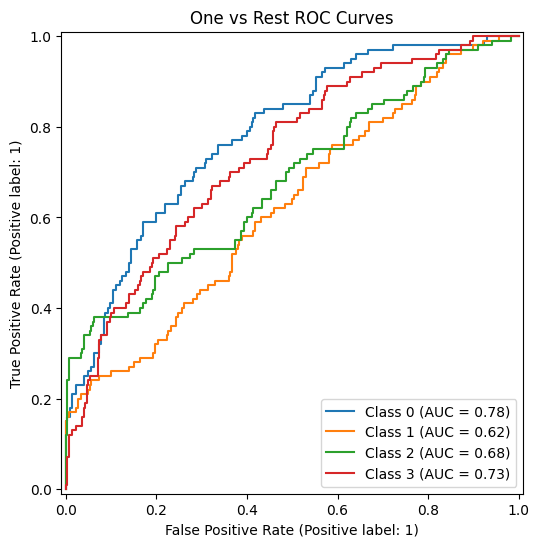

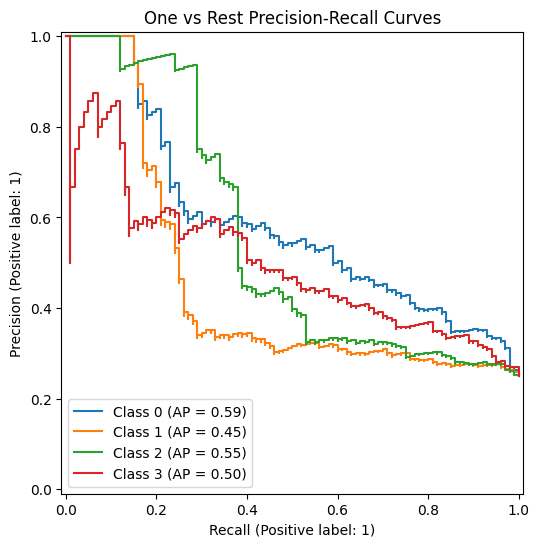

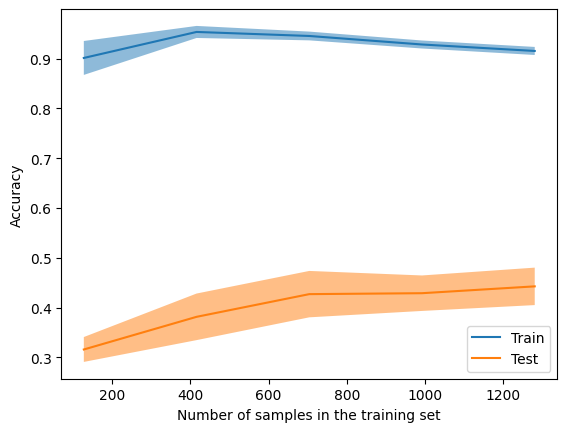

Best hyperparameters:
{'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'preprocessor__numeric': MinMaxScaler()}


In [ ]:
rf_param_grid = {
    'classifier__n_estimators': [100],
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [2, 5],
    'classifier__max_features': ['sqrt']
}


rf_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=RandomForestClassifier(random_state=17, n_jobs=-1),
    scale_option="grid",
    use_gridsearch=True,
    param_grid=rf_param_grid,
    scoring='accuracy',
    n_jobs=-1
)

rf_full_pipeline.fit(X_train, y_train)

rf_best_metrics = evaluate_classifier(
    rf_full_pipeline.best_estimator_,
    X_train, y_train,
    X_test, y_test,
    show_top_n=5
)

print("Best hyperparameters:")
print(rf_full_pipeline.best_params_)

rf_best = rf_full_pipeline.best_estimator_

all_tuned_models_metrics['Random Forest(tuned)'] = rf_best_metrics

In [ ]:
all_tuned_models_metrics['Random Forest(tuned)'].update({
    "best_params": rf_full_pipeline.best_params_
})

### Xgboost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:11:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       100
           1       0.85      0.85      0.85       100
           2       0.88      0.90      0.89       100
           3       1.00      0.95      0.97       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



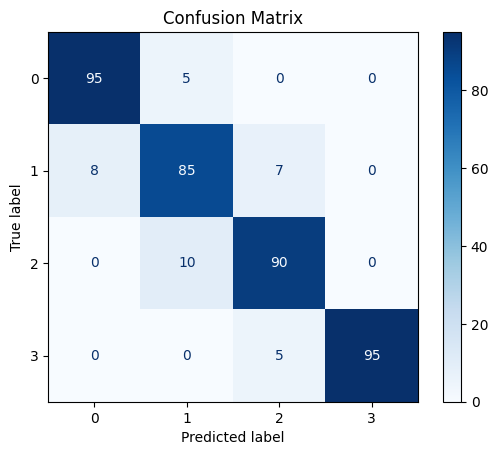


Weighted Precision: 0.914, Recall: 0.912, F1-score: 0.913


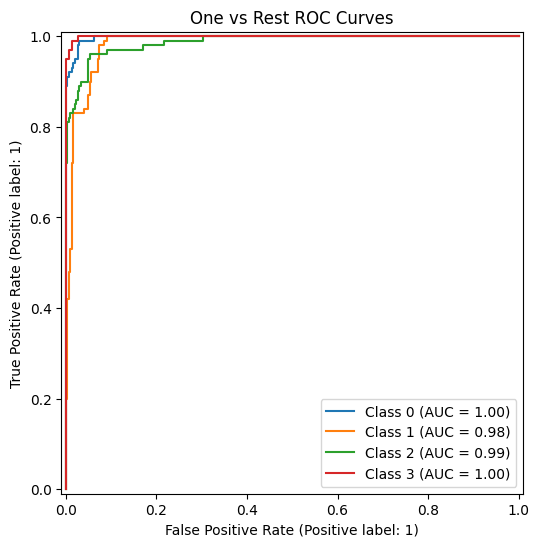

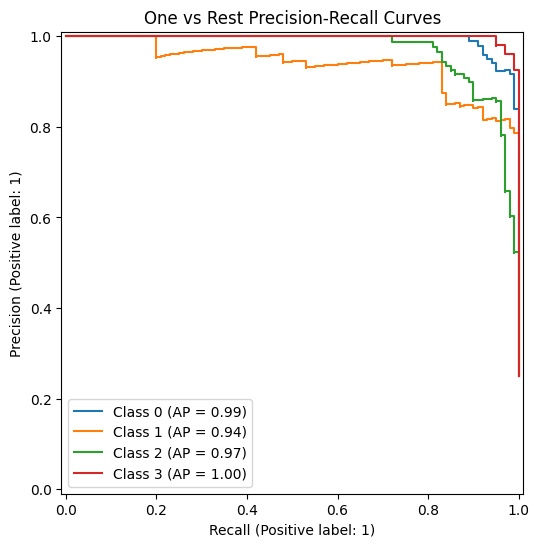

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:11:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:11:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:11:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:11:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:11:33] WARNING: /w

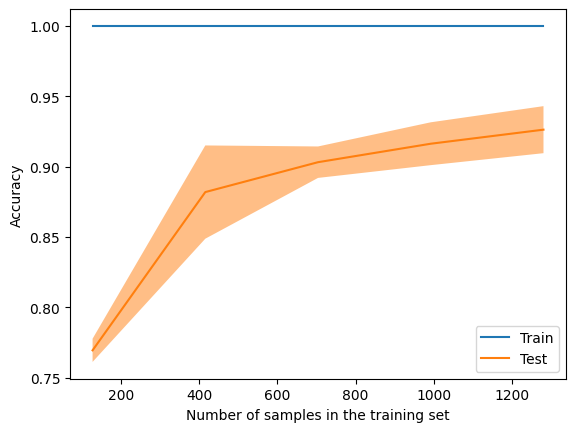

Best hyperparameters:
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 2, 'classifier__subsample': 0.8, 'preprocessor__numeric': StandardScaler()}


In [ ]:
xgb_param_grid = {
    'classifier__n_estimators': [100, ],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__reg_alpha': [0, 0.1],
    'classifier__reg_lambda': [1, 1.5, 2]
}


xgb_full_pipeline = build_classification_pipeline_with_scalers(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=XGBClassifier(random_state=17, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
    scale_option="grid",
    use_gridsearch=True,
    param_grid=xgb_param_grid,
    scoring='accuracy',
    n_jobs=-1
)

xgb_full_pipeline.fit(X_train, y_train)

xgboost_best_metrics = evaluate_classifier(
    xgb_full_pipeline.best_estimator_,
    X_train, y_train,
    X_test, y_test,
    show_top_n=5
)

print("Best hyperparameters:")
print(xgb_full_pipeline.best_params_)

xgboost_best = xgb_full_pipeline.best_estimator_

all_tuned_models_metrics['Xgboost(tuned)'] = xgboost_best_metrics

In [ ]:
all_tuned_models_metrics['Xgboost(tuned)'].update({
    "best_params": xgb_full_pipeline.best_params_
})

## LDA

In [ ]:
def build_classification_pipeline_with_scalers_with_lda(
    df,  # pass  dataframe to autodetect numeric features
    binary_features,
    ordinal_features,
    numeric_features=None,  # optional, if None will auto-detect
    classifier=None,
    scale_option="none",  # "none", "standard", "grid"
    use_gridsearch=False,
    param_grid=None,
    cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
    scoring="accuracy",
    n_jobs=-1,
    use_lda=False,  # disable/enable LDA
    lda_n_components=None  # number of LDA components
):


    if classifier is None:
        classifier = LogisticRegression(max_iter=1000)

    # ordinal transformer
    ordinal_transformer = OrdinalEncoder(categories=list(ordinal_features.values()))

    # auto detect numeric features if not provided
    if numeric_features is None:
        numeric_features = [col for col in df.columns
                          if col not in binary_features and col not in ordinal_features.keys()]

    # For LDA, we need to ensure all features are scaled
    if use_lda:
        if scale_option == "none":
            # Force scaling when using LDA
            scale_option = "standard"
            print("Warning: LDA requires scaled features. Changed scale_option to 'standard'")

    # numeric transformer
    if scale_option == "none":
        numeric_transformer = "passthrough"
    elif scale_option == "standard":
        numeric_transformer = StandardScaler()
    elif scale_option == "grid":
        # placeholder; actual scalers will be added via param_grid
        numeric_transformer = "passthrough"
    else:
        raise ValueError("scale_option must be 'none', 'standard', or 'grid'")

    # preprocessor - this handles all feature transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ("binary", "passthrough", binary_features),
            ("ordinal", ordinal_transformer, list(ordinal_features.keys())),
            ("numeric", numeric_transformer, numeric_features)
        ]
    )

    # build pipeline steps
    pipeline_steps = [("preprocessor", preprocessor)]

    # add LDA step if requested
    if use_lda:
        lda = LinearDiscriminantAnalysis(n_components=lda_n_components)
        pipeline_steps.append(("lda", lda))

    # add classifier
    pipeline_steps.append(("classifier", classifier))

    # create pipeline
    pipe = Pipeline(pipeline_steps)

    # grid search
    if use_gridsearch:
        if param_grid is None:
            param_grid = {}

        # add scaler options to param_grid if scale_option is "grid"
        if scale_option == "grid":
            if use_lda:
                # for lda, we must have scaling, so exclude "passthrough"
                param_grid["preprocessor__numeric"] = [
                    StandardScaler(),
                    MinMaxScaler(),
                    RobustScaler()
                ]
            else:
                param_grid["preprocessor__numeric"] = [
                    StandardScaler(),
                    MinMaxScaler(),
                    RobustScaler(),
                    "passthrough"
                ]

        # add LDA hyperparameters if using LDA
        if use_lda:
            # add LDA n_components to grid search if not already specified
            if "lda__n_components" not in param_grid:
                # Common choices for LDA components
                param_grid["lda__n_components"] = [3] # 4 klase -> n-1 = 3

            # add lda solver options
            if "lda__solver" not in param_grid:
                param_grid["lda__solver"] = ['svd']

        return GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=cv,
            scoring=scoring,
            n_jobs=n_jobs
        )
    else:
        return pipe


### Logistic Regression

In [ ]:
all_tuned_models_lda_metrics = {}

Classification Report:

              precision    recall  f1-score   support

           0       0.37      0.55      0.45       100
           1       0.35      0.07      0.12       100
           2       0.36      0.20      0.26       100
           3       0.37      0.66      0.47       100

    accuracy                           0.37       400
   macro avg       0.36      0.37      0.32       400
weighted avg       0.36      0.37      0.32       400



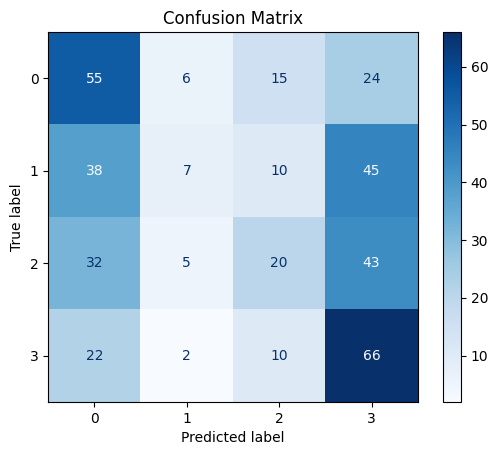


Weighted Precision: 0.365, Recall: 0.370, F1-score: 0.324


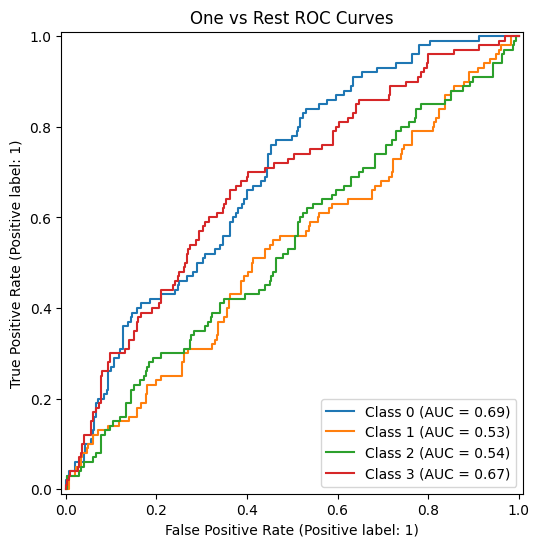

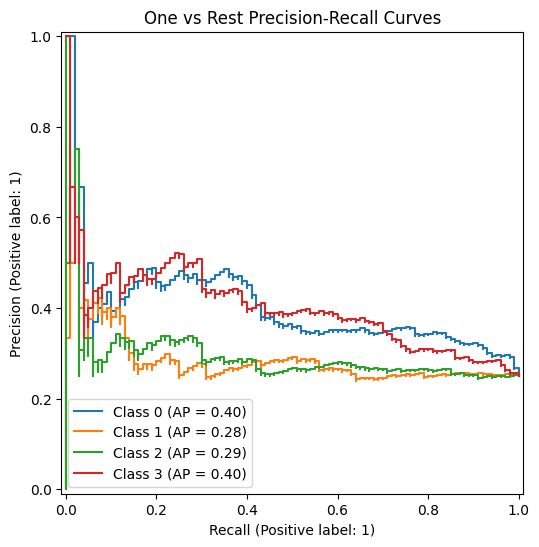

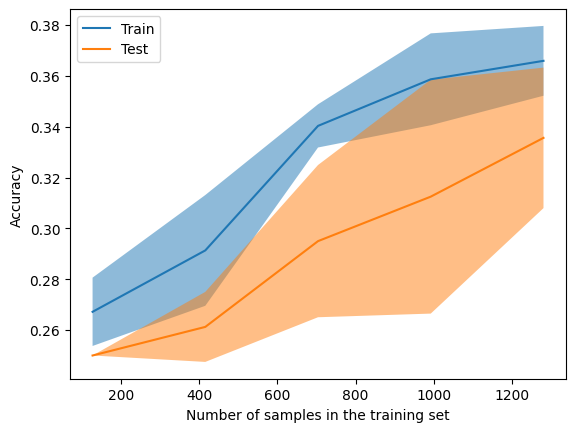

Best hyperparameters:
{'classifier__C': 0.01, 'classifier__l1_ratio': 0.7, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga', 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_log_reg_saga = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1','l2','elasticnet'],
    'classifier__solver': ['saga'],
    'classifier__l1_ratio': [0.1,0.3,0.5,0.7,0.9]
}

pipe_saga_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=LogisticRegression(max_iter=1000),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_log_reg_saga,
    use_lda=True
)
pipe_saga_lda.fit(X_train, y_train)
log_reg_best_saga_lda_metrics = evaluate_classifier(pipe_saga_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['Logistic Regression - SAGA - LDA (tuned)'] = log_reg_best_saga_lda_metrics

print("Best hyperparameters:")
print(pipe_saga_lda.best_params_)

In [ ]:
all_tuned_models_lda_metrics['Logistic Regression - SAGA - LDA (tuned)'].update({
    "best_params": pipe_saga_lda.best_params_
})

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       100
           1       0.24      0.18      0.21       100
           2       0.31      0.23      0.26       100
           3       0.38      0.53      0.44       100

    accuracy                           0.35       400
   macro avg       0.34      0.35      0.34       400
weighted avg       0.34      0.35      0.34       400



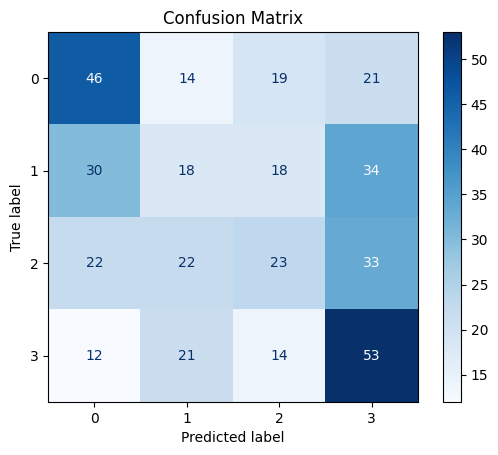


Weighted Precision: 0.336, Recall: 0.350, F1-score: 0.337


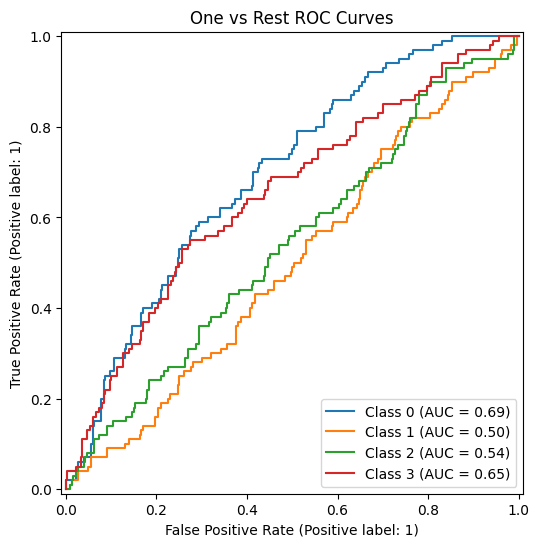

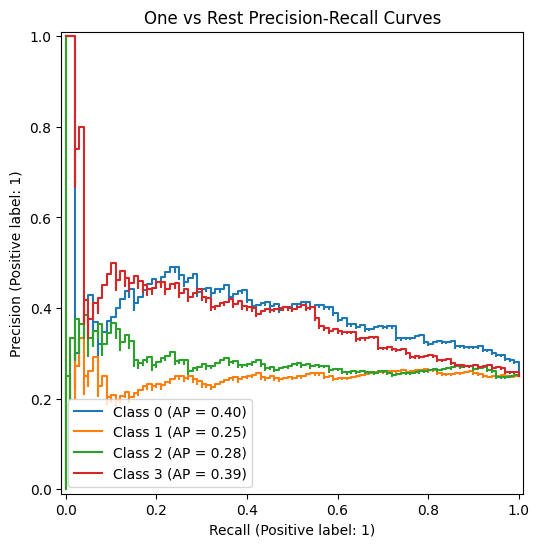

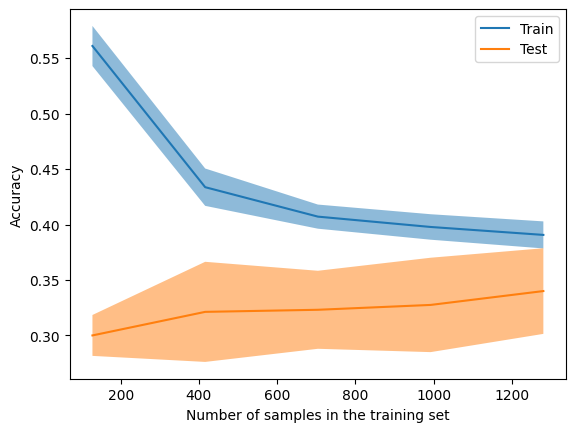

In [ ]:
param_grid_log_reg_liblinear = {
    'classifier__C': [0.01,0.1,1,10],
    'classifier__penalty': ['l1','l2'],
    'classifier__solver': ['liblinear']
}

pipe_liblinear_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=LogisticRegression(max_iter=1000),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_log_reg_liblinear,
    use_lda=True
)
pipe_liblinear_lda.fit(X_train, y_train)
log_reg_best_liblinear_lda_metrics = evaluate_classifier(pipe_liblinear_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['Logistic Regression - LIBLINEAR - LDA (tuned)'] = log_reg_best_liblinear_lda_metrics

In [ ]:
all_tuned_models_lda_metrics['Logistic Regression - LIBLINEAR - LDA (tuned)'].update({
    "best_params": pipe_liblinear_lda.best_params_
})

### KNN

Classification Report:

              precision    recall  f1-score   support

           0       0.31      0.40      0.35       100
           1       0.24      0.26      0.25       100
           2       0.26      0.19      0.22       100
           3       0.26      0.23      0.24       100

    accuracy                           0.27       400
   macro avg       0.27      0.27      0.27       400
weighted avg       0.27      0.27      0.27       400



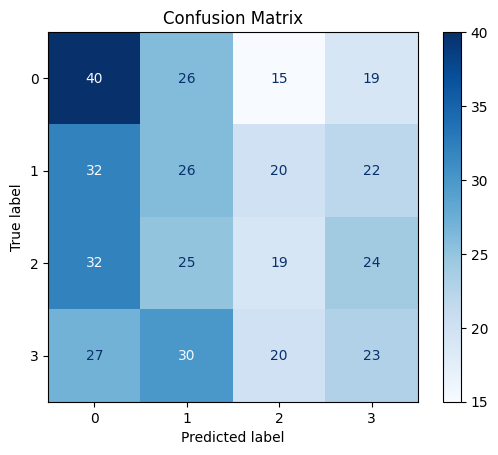


Weighted Precision: 0.267, Recall: 0.270, F1-score: 0.265


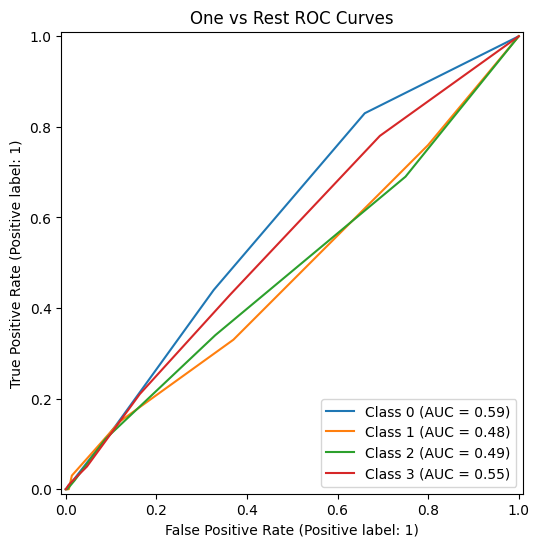

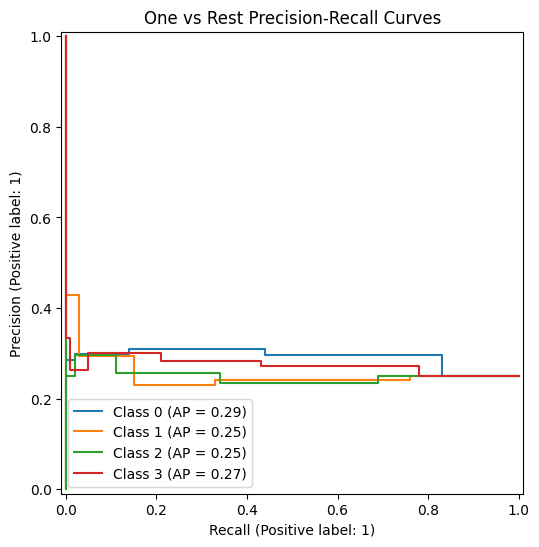

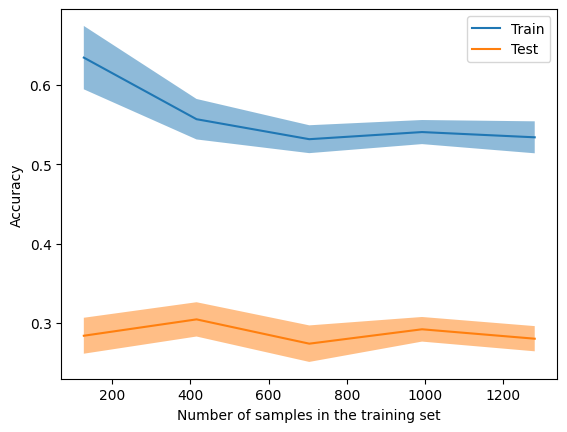

Best hyperparameters:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform', 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_knn = {
    'classifier__n_neighbors': [3,5,7],
    'classifier__weights': ['uniform','distance'],
    'classifier__metric': ['euclidean','manhattan']
}

pipe_knn_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=KNeighborsClassifier(),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_knn,
    use_lda=True
)
pipe_knn_lda.fit(X_train, y_train)
knn_best_lda_metrics = evaluate_classifier(pipe_knn_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['KNN - LDA (tuned)'] = knn_best_lda_metrics

print("Best hyperparameters:")
print(pipe_knn_lda.best_params_)

In [ ]:
all_tuned_models_lda_metrics['KNN - LDA (tuned)'].update({
    "best_params": pipe_knn_lda.best_params_
})

### SVM

Classification Report:

              precision    recall  f1-score   support

           0       0.41      0.45      0.43       100
           1       0.26      0.18      0.21       100
           2       0.33      0.28      0.30       100
           3       0.39      0.53      0.45       100

    accuracy                           0.36       400
   macro avg       0.35      0.36      0.35       400
weighted avg       0.35      0.36      0.35       400



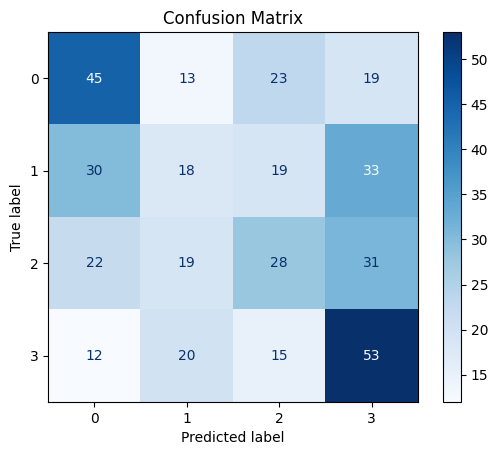


Weighted Precision: 0.347, Recall: 0.360, F1-score: 0.349


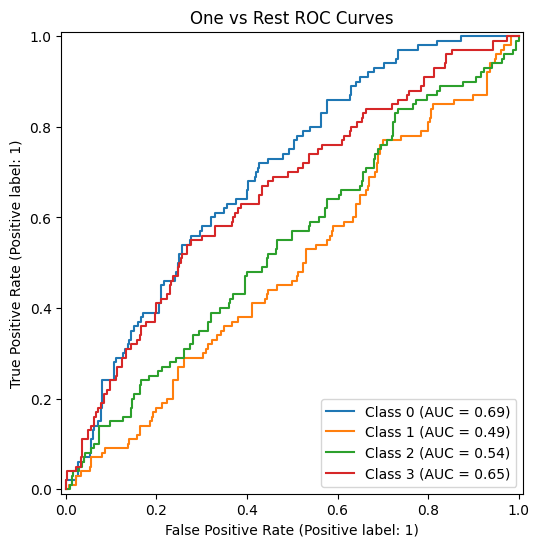

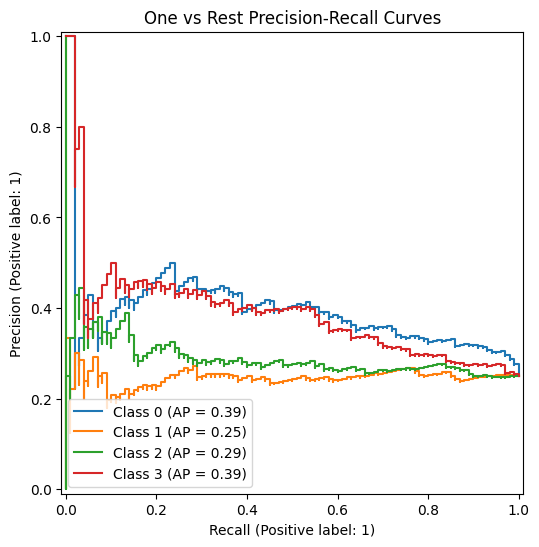

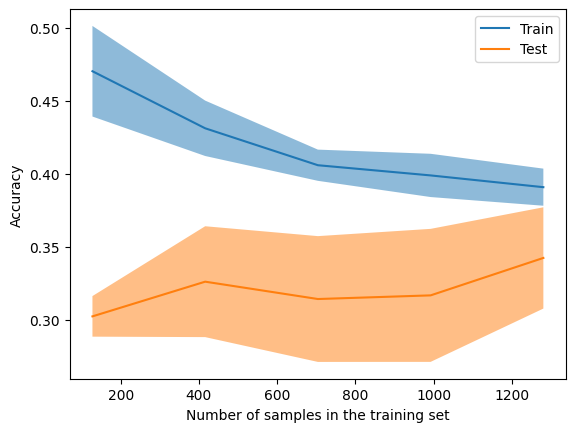

Best hyperparameters:
{'classifier__C': 0.01, 'classifier__kernel': 'linear', 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_svc_linear = {
    'classifier__C': [0.01,0.1,1,10],
    'classifier__kernel': ['linear']
}

pipe_svc_linear_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=True, random_state=17),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_svc_linear,
    use_lda=True
)
pipe_svc_linear_lda.fit(X_train, y_train)
svc_linear_best_lda_metrics = evaluate_classifier(pipe_svc_linear_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['SVM - LINEAR - LDA (tuned)'] = svc_linear_best_lda_metrics

print("Best hyperparameters:")
print(pipe_svc_linear_lda.best_params_)

In [ ]:
all_tuned_models_lda_metrics['SVM - LINEAR - LDA (tuned)'].update({
    "best_params": pipe_svc_linear_lda.best_params_
})

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       100
           1       0.27      0.18      0.22       100
           2       0.34      0.29      0.31       100
           3       0.39      0.53      0.45       100

    accuracy                           0.36       400
   macro avg       0.35      0.36      0.35       400
weighted avg       0.35      0.36      0.35       400



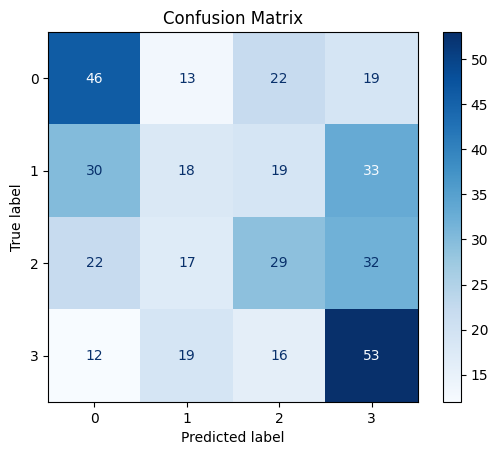


Weighted Precision: 0.353, Recall: 0.365, F1-score: 0.353


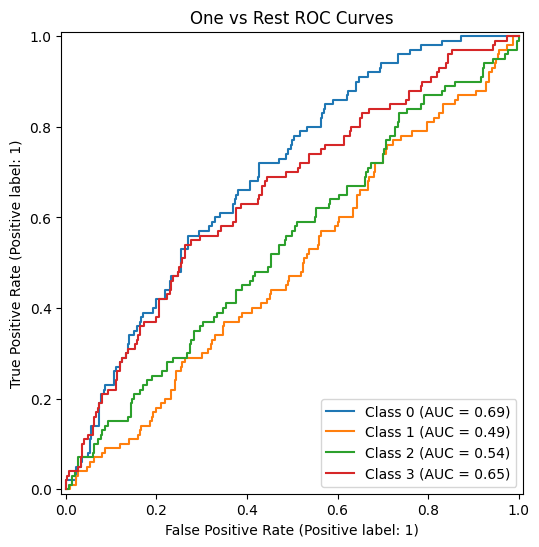

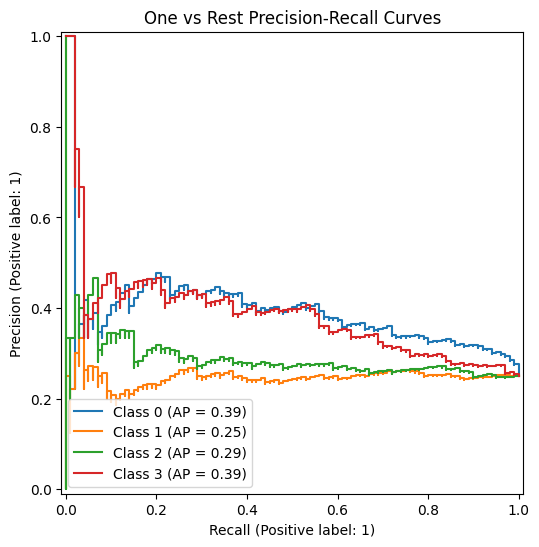

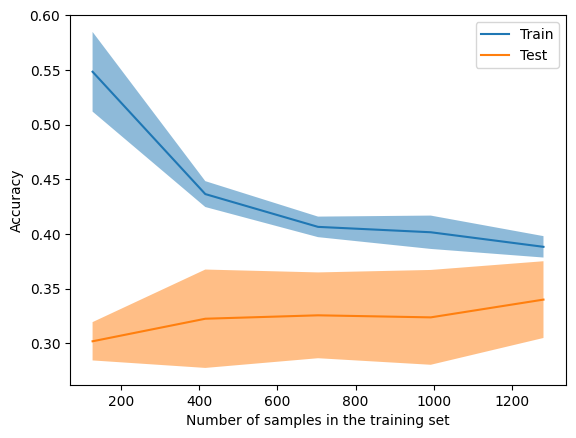

Best hyperparameters:
{'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_svc_rbf = {
    'classifier__C': [0.01,0.1,1,10],
    'classifier__gamma': ['scale',0.001,0.01,0.1,1,10],
    'classifier__kernel': ['rbf']
}

pipe_svc_rbf_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=True, random_state=17),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_svc_rbf,
    use_lda=True
)
pipe_svc_rbf_lda.fit(X_train, y_train)
svc_radial_best_lda_metrics = evaluate_classifier(pipe_svc_rbf_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['SVM - RADIAL - LDA (tuned)'] = svc_linear_best_lda_metrics

print("Best hyperparameters:")
print(pipe_svc_rbf_lda.best_params_)

In [ ]:
all_tuned_models_lda_metrics['SVM - RADIAL - LDA (tuned)'].update({
    "best_params": pipe_svc_rbf_lda.best_params_
})

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.32      0.36       100
           1       0.22      0.18      0.20       100
           2       0.25      0.35      0.29       100
           3       0.44      0.45      0.44       100

    accuracy                           0.33       400
   macro avg       0.33      0.33      0.32       400
weighted avg       0.33      0.33      0.32       400



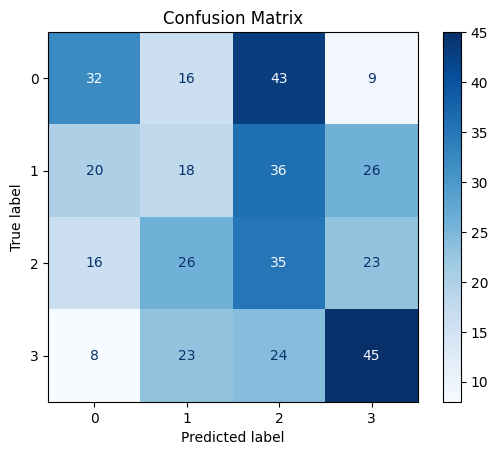


Weighted Precision: 0.332, Recall: 0.325, F1-score: 0.324


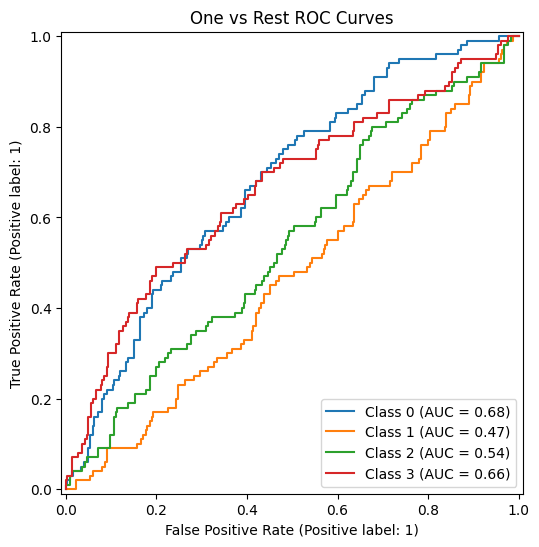

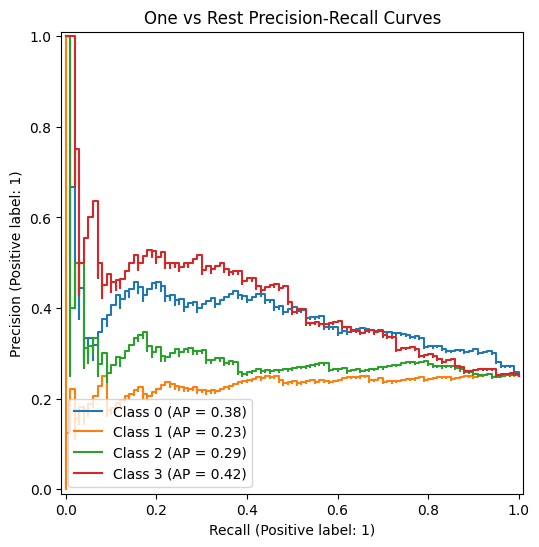

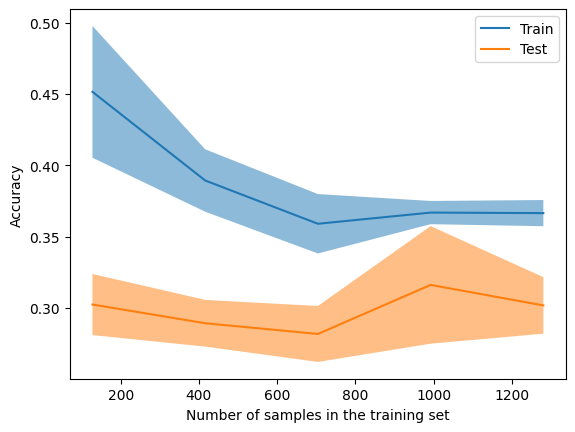

Best hyperparameters:
{'classifier__C': 1, 'classifier__degree': 3, 'classifier__gamma': 0.1, 'classifier__kernel': 'poly', 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_svc_poly = {
    'classifier__C': [0.1,1,10],
    'classifier__gamma': ['scale',0.001,0.01,0.1,1],
    'classifier__degree': [2,3],
    'classifier__kernel': ['poly']
}

pipe_svc_poly_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=True, random_state=17),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_svc_poly,
    use_lda=True
)
pipe_svc_poly_lda.fit(X_train, y_train)
svc_poly_best_lda_metrics = evaluate_classifier(pipe_svc_poly_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['SVM - POLY - LDA (tuned)'] = svc_poly_best_lda_metrics

print("Best hyperparameters:")
print(pipe_svc_poly_lda.best_params_)

In [ ]:
all_tuned_models_lda_metrics['SVM - POLY - LDA (tuned)'].update({
    "best_params": pipe_svc_poly_lda.best_params_
})

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.94      0.93      0.93       100
           2       0.93      0.89      0.91       100
           3       0.93      0.96      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



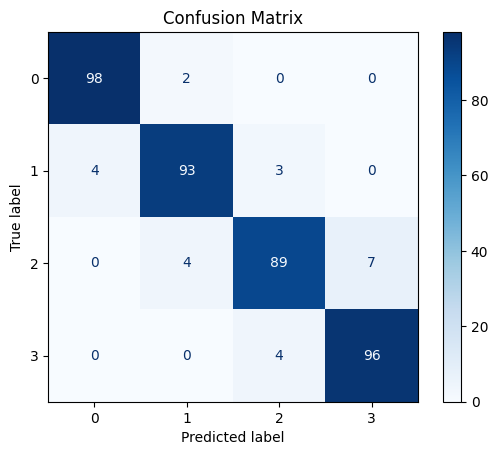


Weighted Precision: 0.940, Recall: 0.940, F1-score: 0.940


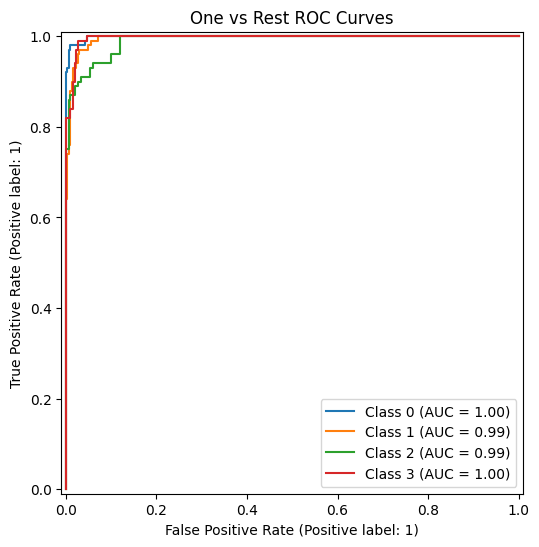

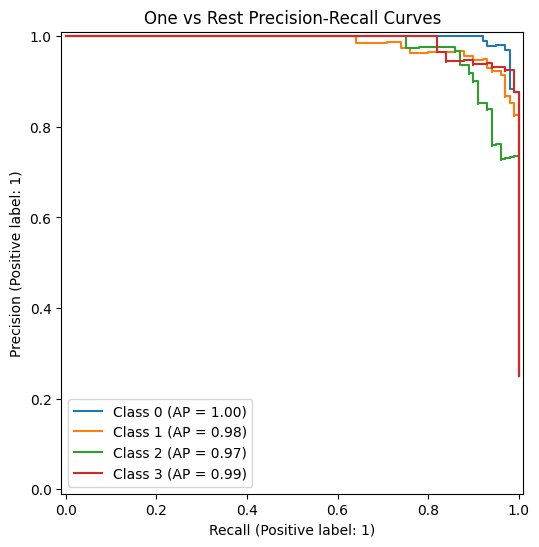

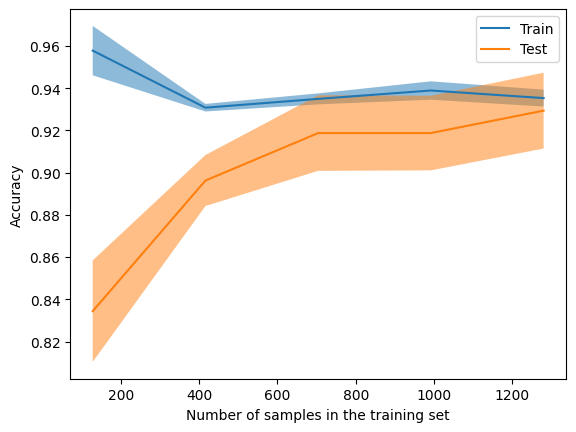

Best hyperparameters:
{'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'sigmoid', 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_svc_sigmoid = {
    'classifier__C': [0.01,0.1,1,10],
    'classifier__gamma': ['scale',0.001,0.01,0.1,1,10],
    'classifier__kernel': ['sigmoid']
}

pipe_svc_sigmoid_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=SVC(probability=True, random_state=17),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_svc_sigmoid,
    use_lda=True
)
pipe_svc_sigmoid_lda.fit(X_train, y_train)
svc_sigmoid_best_lda_metrics = evaluate_classifier(pipe_svc_sigmoid_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['SVM - SIGMOID - LDA (tuned)'] = svc_sigmoid_best_lda_metrics

print("Best hyperparameters:")
print(pipe_svc_sigmoid_lda.best_params_)

In [ ]:
all_tuned_models_lda_metrics['SVM - SIGMOID - LDA (tuned)'].update({
    "best_params": pipe_svc_sigmoid_lda.best_params_
})

### Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       100
           1       0.94      0.89      0.91       100
           2       0.88      0.92      0.90       100
           3       0.95      0.91      0.93       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



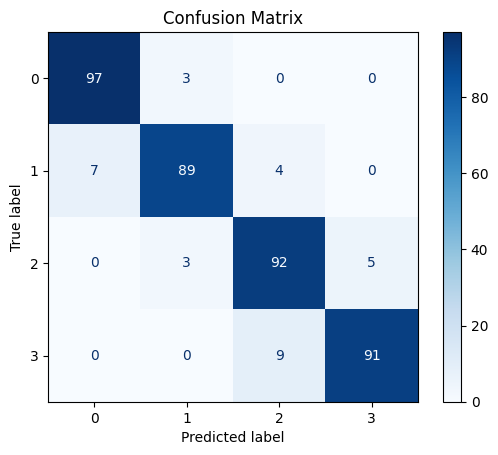


Weighted Precision: 0.923, Recall: 0.922, F1-score: 0.922


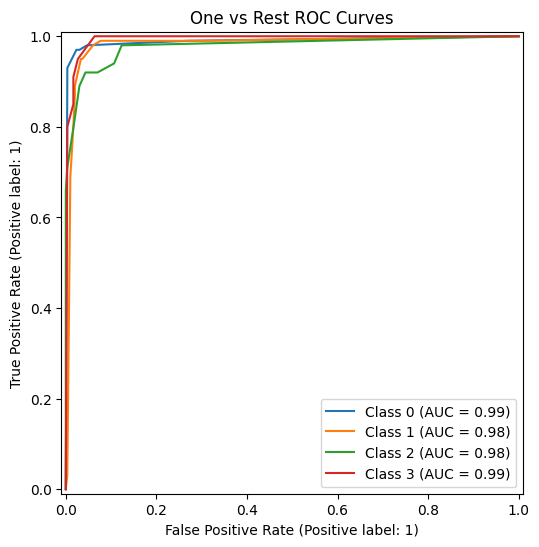

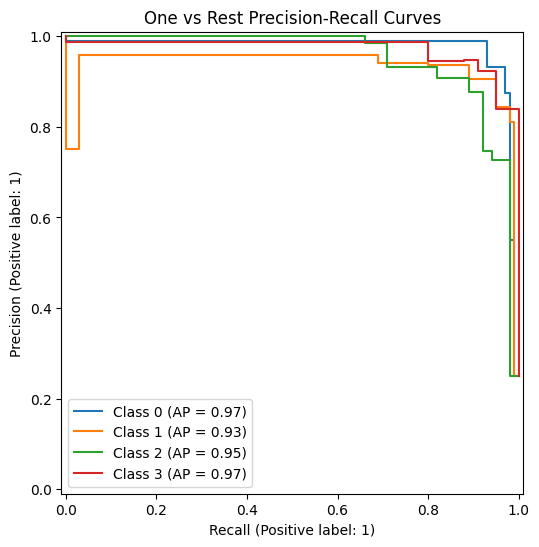

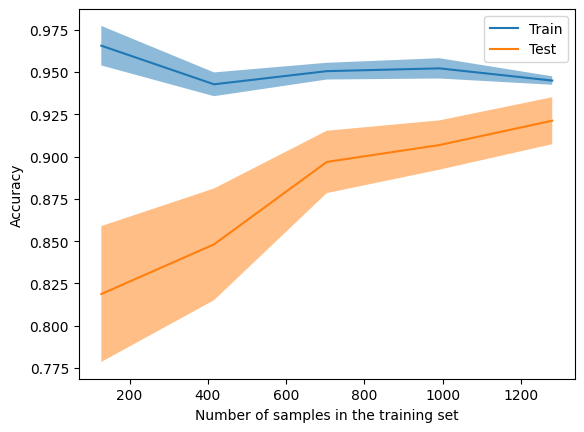

Best hyperparameters:
{'classifier__max_depth': 5, 'classifier__max_features': 2, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_dt = {
    'classifier__max_depth': [None,3,5],
    'classifier__min_samples_split': [2,5,10],
    'classifier__min_samples_leaf': [1,2,5],
    'classifier__max_features': [1,2,3]
}

pipe_dt_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=DecisionTreeClassifier(random_state=17),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_dt,
    use_lda=True
)
pipe_dt_lda.fit(X_train, y_train)
dt_best_lda_metrics = evaluate_classifier(pipe_dt_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['Decision Tree - LDA (tuned)'] = dt_best_lda_metrics

print("Best hyperparameters:")
print(pipe_dt_lda.best_params_)

In [ ]:
all_tuned_models_lda_metrics['Decision Tree - LDA (tuned)'].update({
    "best_params": pipe_dt_lda.best_params_
})

### Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.94      0.94      0.94       100
           2       0.92      0.90      0.91       100
           3       0.93      0.96      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



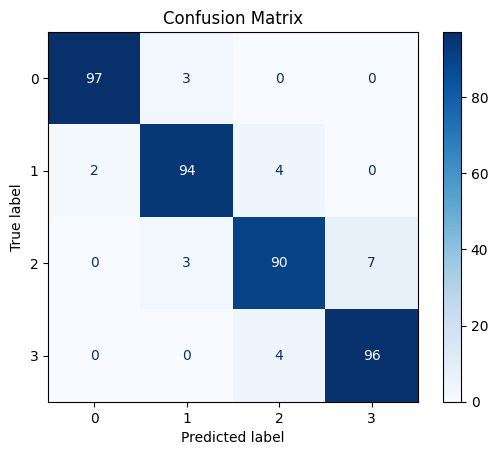


Weighted Precision: 0.943, Recall: 0.943, F1-score: 0.942


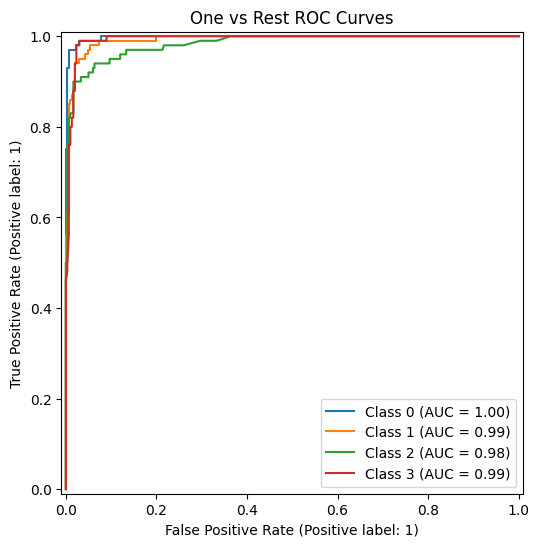

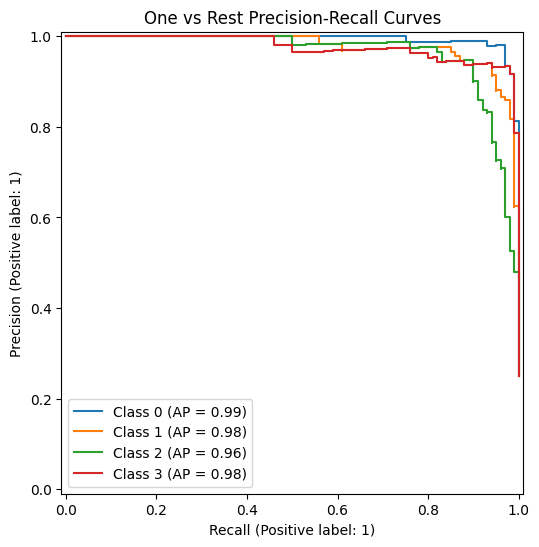

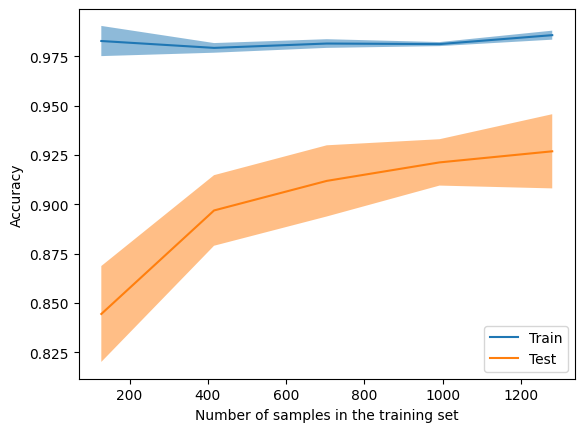

Best hyperparameters:
{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 2, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_rf = {
    'classifier__n_estimators': [200,500],
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [None,3,5,10],
    'classifier__min_samples_split': [2,5,10],
    'classifier__min_samples_leaf': [1,2,3],
    'classifier__max_features': [1,2,3]
}

pipe_rf_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=RandomForestClassifier(random_state=17),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_rf,
    use_lda=True
)
pipe_rf_lda.fit(X_train, y_train)
rf_best_lda_metrics = evaluate_classifier(pipe_rf_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['Random Forest - LDA (tuned)'] = rf_best_lda_metrics

print("Best hyperparameters:")
print(pipe_rf_lda.best_params_)

In [ ]:
best_rf_lda = pipe_rf_lda.best_estimator_

In [ ]:
all_tuned_models_lda_metrics['Random Forest - LDA (tuned)'].update({
    "best_params": pipe_rf_lda.best_params_
})

### Xgboost

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.93      0.94      0.94       100
           2       0.92      0.89      0.90       100
           3       0.92      0.96      0.94       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



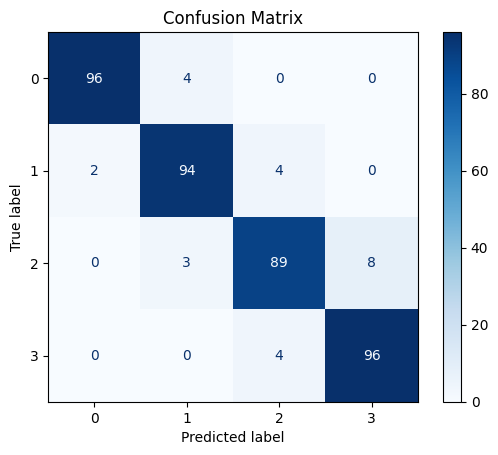


Weighted Precision: 0.938, Recall: 0.938, F1-score: 0.937


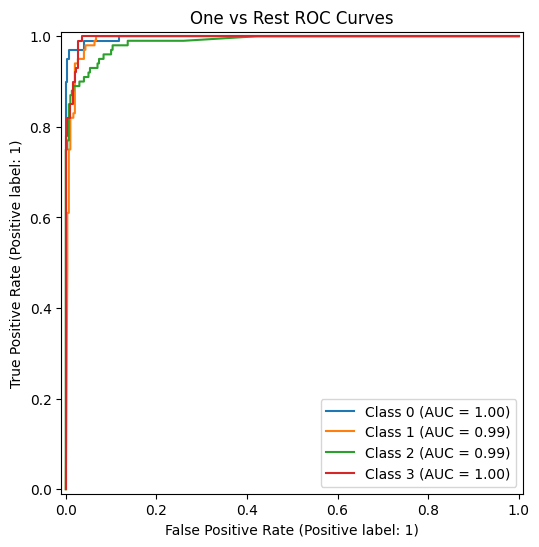

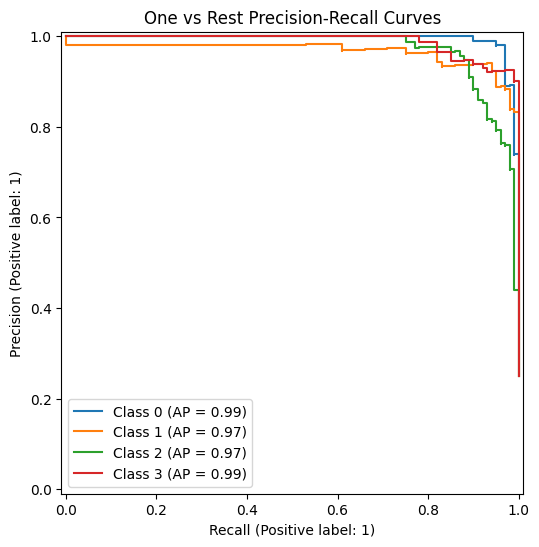

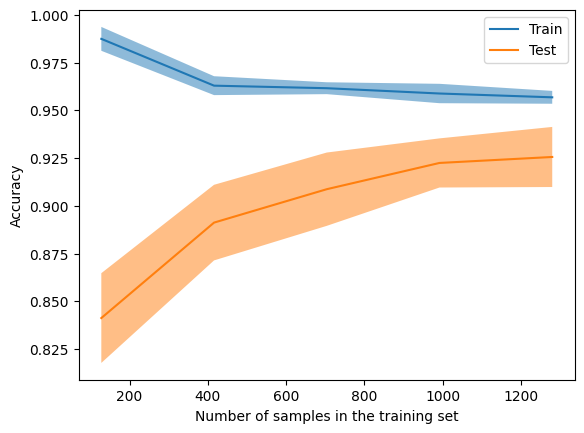

Best hyperparameters:
{'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 4, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8, 'lda__n_components': 3, 'lda__solver': 'svd'}


In [ ]:
param_grid_xgb = {
    'classifier__n_estimators': [50,100,150],
    'classifier__max_depth': [2,3,4],
    'classifier__learning_rate': [0.05,0.1,0.2],
    'classifier__subsample': [0.8,1.0],
    'classifier__colsample_bytree': [1.0]
}



pipe_xgb_lda = build_classification_pipeline_with_scalers_with_lda(
    df=X_train,
    binary_features=binary_features,
    ordinal_features=ordinal_features,
    classifier=XGBClassifier(random_state=17, eval_metric='mlogloss'),
    scale_option="standard",
    use_gridsearch=True,
    param_grid=param_grid_xgb,
    use_lda=True
)
pipe_xgb_lda.fit(X_train, y_train)
xgboost_best_lda_metrics = evaluate_classifier(pipe_xgb_lda.best_estimator_, X_train, y_train, X_test, y_test)

all_tuned_models_lda_metrics['Xgboost - LDA (tuned)'] = xgboost_best_lda_metrics

print("Best hyperparameters:")
print(pipe_xgb_lda.best_params_)

In [ ]:
all_tuned_models_lda_metrics['Xgboost - LDA (tuned)'].update({
    "best_params": pipe_xgb_lda.best_params_
})

### LDA granica odlucivanja

LDA dim: 3


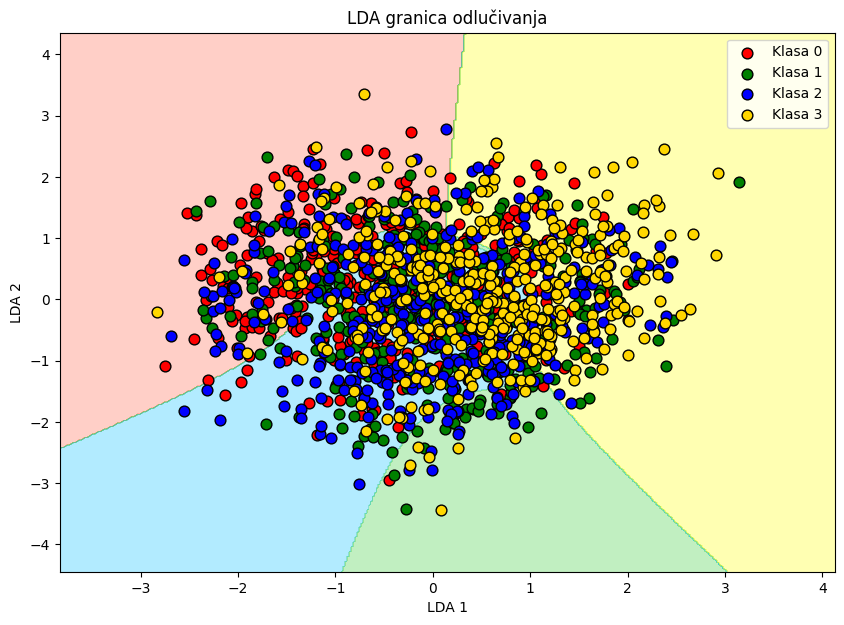

In [ ]:
best_pipe = pipe_svc_poly_lda.best_estimator_

# Transformacija trening podataka pomoću LDA
X_lda = best_pipe.named_steps['lda'].transform(best_pipe.named_steps['preprocessor'].transform(X_train))
y_lda = np.array(y_train)

n_components = X_lda.shape[1]
print("LDA dim:", n_components)

# Za prikaz koristimo samo prve 2 LDA komponente
X_plot = X_lda[:, :2]

# Meshgrid za crtanje granica
h = 0.02
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# LDA ima vise od 2 komponente (4 klase - 1 = 3)
if n_components > 2:
    extra_dims = np.zeros((grid_points.shape[0], n_components - 2))
    grid_points = np.hstack([grid_points, extra_dims])

# predikcija za svaki grid point
clf = best_pipe.named_steps['classifier']
Z = clf.predict(grid_points)
Z = Z.reshape(xx.shape)

# colormap za klase
cmap_background = ListedColormap(['tomato', 'limegreen', 'deepskyblue', 'yellow'])
cmap_points = ['red', 'green', 'blue', 'gold']

plt.figure(figsize=(10, 7))

# granice odlucivanja sa colormap
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# tacke trening podataka
for i, c in enumerate(np.unique(y_lda)):
    idx = np.where(y_lda == c)
    plt.scatter(X_plot[idx, 0], X_plot[idx, 1],
                c=cmap_points[i], edgecolor='k', s=60, label=f"Klasa {c}")

plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA granica odlučivanja')
plt.legend()
plt.show()


## All groups performance (dataframes)

### Base Unscaled Models

In [ ]:
base_unscaled_models_dataframe = pd.DataFrame.from_dict(all_base_unscaled_models_metrics)

In [ ]:
base_unscaled_models_dataframe.index

Index(['test_accuracy', 'precision', 'recall', 'f1_score', 'best_cv_score',
       'best_params', 'confusion_matrix', 'cv_results'],
      dtype='object')

In [ ]:
base_unscaled_models_dataframe.loc[['test_accuracy', 'precision', 'recall', 'f1_score']]

Base Logistic Regression(unscaled) Base KNN(unscaled)  \
test_accuracy                              0.745             0.9275   
precision                               0.745673           0.927502   
recall                                     0.745             0.9275   
f1_score                                 0.74465             0.9273   

              Base Decision Tree(unscaled) Base Random Forest(unscaled)  \
test_accuracy                         0.85                       0.8925   
precision                         0.848279                     0.893181   
recall                                0.85                       0.8925   
f1_score                           0.84872                     0.892312   

              Base Xgboost(unscaled) Base SVM(unscaled)  
test_accuracy                 0.9275             0.9425  
precision                   0.928208           0.942576  
recall                        0.9275             0.9425  
f1_score                     0.92777           0.942214

### Scaled Base Models

In [ ]:
base_scaled_models_dataframe = pd.DataFrame.from_dict(all_base_scaled_models_metrics)

In [ ]:
base_scaled_models_dataframe.loc[['test_accuracy', 'precision', 'recall', 'f1_score']]

Base Logistic Regression(scaled) Base KNN(scaled)  \
test_accuracy                            0.915            0.665   
precision                             0.914269         0.667652   
recall                                   0.915            0.665   
f1_score                              0.914486         0.664362   

              Base SVM(scaled) Base Decision Tree(scaled)  \
test_accuracy           0.8925                       0.85   
precision              0.89312                   0.848279   
recall                  0.8925                       0.85   
f1_score              0.892642                    0.84872   

              Base Random Forest(scaled) Base Xgboost(scaled)  
test_accuracy                     0.8925               0.9275  
precision                       0.893181             0.928208  
recall                            0.8925               0.9275  
f1_score                        0.892312              0.92777

### Base Models Sensitive to Scaling


In [ ]:
base_scaled_distance_models_dataframe = pd.DataFrame.from_dict(all_base_scaled_distance_models_metrics)

In [ ]:
base_scaled_distance_models_dataframe.loc[['test_accuracy', 'precision', 'recall', 'f1_score','best_params']]

Base Logistic Regression(different scalers)  \
test_accuracy                                        0.915   
precision                                         0.914269   
recall                                               0.915   
f1_score                                          0.914486   
best_params    {'preprocessor__numeric': StandardScaler()}   

                               Base KNN(different scalers)  \
test_accuracy                                        0.915   
precision                                         0.914269   
recall                                               0.915   
f1_score                                          0.914486   
best_params    {'preprocessor__numeric': StandardScaler()}   

                            Base SVM(different scalers)  
test_accuracy                                    0.9425  
precision                                      0.942576  
recall                                           0.9425  
f1_score                                       0.942214  
best_params    {'preprocessor__numeric': 'passthrough'}

### Tuned Models

In [ ]:
tuned_models_dataframe = pd.DataFrame.from_dict(all_tuned_models_metrics)

In [ ]:
tuned_models_dataframe.loc[['test_accuracy', 'precision', 'recall', 'f1_score','best_params']]

Logistic Regression - SAGA (tuned)  \
test_accuracy                                               0.95   
precision                                               0.950405   
recall                                                      0.95   
f1_score                                                0.949989   
best_params    {'classifier__C': 10, 'classifier__l1_ratio': ...   

                         Logistic Regression - LIBLINEAR (tuned)  \
test_accuracy                                               0.95   
precision                                               0.950405   
recall                                                      0.95   
f1_score                                                0.949989   
best_params    {'classifier__C': 10, 'classifier__l1_ratio': ...   

                                                      KNN(tuned)  \
test_accuracy                                             0.9375   
precision                                               0.937373   
recall                                                    0.9375   
f1_score                                                0.937307   
best_params    {'classifier__metric': 'manhattan', 'classifie...   

                                            SVM - LINEAR (tuned)  \
test_accuracy                                             0.9425   
precision                                               0.942391   
recall                                                    0.9425   
f1_score                                                0.942342   
best_params    {'classifier__C': 0.1, 'classifier__kernel': '...   

                                            SVM - RADIAL (tuned)  \
test_accuracy                                             0.9275   
precision                                               0.927907   
recall                                                    0.9275   
f1_score                                                0.927055   
best_params    {'classifier__C': 10, 'classifier__gamma': 'sc...   

                                        SVM - POLY (fast, tuned)  \
test_accuracy                                              0.935   
precision                                               0.934808   
recall                                                     0.935   
f1_score                                                0.934728   
best_params    {'classifier__C': 1, 'classifier__degree': 2, ...   

                                           SVM - SIGMOID (tuned)  \
test_accuracy                                               0.86   
precision                                               0.862193   
recall                                                      0.86   
f1_score                                                0.860282   
best_params    {'classifier__C': 1, 'classifier__gamma': 0.01...   

                                            Decision Tree(tuned)  \
test_accuracy                                               0.87   
precision                                               0.868712   
recall                                                      0.87   
f1_score                                                0.868766   
best_params    {'classifier__criterion': 'gini', 'classifier_...   

                                            Random Forest(tuned)  \
test_accuracy                                             0.8775   
precision                                               0.878174   
recall                                                    0.8775   
f1_score                                                0.877357   
best_params    {'classifier__criterion': 'gini', 'classifier_...   

                                                  Xgboost(tuned)  
test_accuracy                                             0.9125  
precision                                               0.913671  
recall                                                    0.9125  
f1_score                                                0.912852  
best_params   

In [ ]:
tuned_models_dataframe = pd.DataFrame.from_dict(all_tuned_models_metrics)

### LDA Models

In [ ]:
tuned_models_lda_dataframe = pd.DataFrame.from_dict(all_tuned_models_lda_metrics)

In [ ]:
tuned_models_lda_dataframe.loc[['test_accuracy', 'precision', 'recall', 'f1_score','best_params']]

Logistic Regression - SAGA - LDA (tuned)  \
test_accuracy                                               0.94   
precision                                               0.939954   
recall                                                      0.94   
f1_score                                                0.939825   
best_params    {'classifier__C': 1, 'classifier__l1_ratio': 0...   

                   Logistic Regression - LIBLINEAR - LDA (tuned)  \
test_accuracy                                             0.8425   
precision                                               0.839616   
recall                                                    0.8425   
f1_score                                                0.839848   
best_params    {'classifier__C': 10, 'classifier__penalty': '...   

                                               KNN - LDA (tuned)  \
test_accuracy                                              0.935   
precision                                               0.935084   
recall                                                     0.935   
f1_score                                                0.934625   
best_params    {'classifier__metric': 'manhattan', 'classifie...   

                                      SVM - LINEAR - LDA (tuned)  \
test_accuracy                                               0.94   
precision                                               0.939954   
recall                                                      0.94   
f1_score                                                0.939825   
best_params    {'classifier__C': 10, 'classifier__gamma': 0.1...   

                                      SVM - RADIAL - LDA (tuned)  \
test_accuracy                                               0.94   
precision                                               0.939954   
recall                                                      0.94   
f1_score                                                0.939825   
best_params    {'classifier__C': 10, 'classifier__gamma': 0.1...   

                                        SVM - POLY - LDA (tuned)  \
test_accuracy                                              0.935   
precision                                               0.935231   
recall                                                     0.935   
f1_score                                                0.935033   
best_params    {'classifier__C': 1, 'classifier__degree': 3, ...   

                                     SVM - SIGMOID - LDA (tuned)  \
test_accuracy                                               0.94   
precision                                               0.939825   
recall                                                      0.94   
f1_score                                                0.939737   
best_params    {'classifier__C': 10, 'classifier__gamma': 0.0...   

                                     Decision Tree - LDA (tuned)  \
test_accuracy                                             0.9225   
precision                                                0.92341   
recall                                                    0.9225   
f1_score                                                0.922483   
best_params    {'classifier__max_depth': 5, 'classifier__max_...   

                                     Random Forest - LDA (tuned)  \
test_accuracy                                             0.9425   
precision                                               0.942551   
recall                                                    0.9425   
f1_score                                                0.942445   
best_params    {'classifier__criterion': 'gini', 'classifier_...   

                                           Xgboost - LDA (tuned)  
test_accuracy                                             0.9375  
precision                                               0.937722  
recall                                                    0.9375  
f1_score                                                0.937438  
best_par